# TASK


#Project 1-Sales Forecasting

## Overview
The main objective of this project (e.g., predicting sales based on historical data).
A brief explanation of the approaches used (VARMAX for multi-variable relationships, LSTM for complex time-series patterns).


## Dataset
Data source.
Description of key features (date, sales, promotion, external variables).
Handling missing value and date.


## Tools & Technologies Used
Environment: Google Colab / Jupyter Notebook / Local Python Environment.
Modeling Tools:
VARMAX using statsmodels.tsa.statespace.varmax.VARMAX
LSTM using tensorflow.keras


## Data Preprocessing
Feature normalization / standardization.
Time transformations (lag features, differencing for VARMAX).
Splitting data into train and test sets.


## Model Development
VARMAX : Selecting optimal parameters (p, q), performance evaluation using MSE or AIC/BIC.
LSTM : Model architecture (number of layers, dropout, activation functions), hyperparameter selection (optimizer, batch size, epochs), callback functions such as EarlyStopping


## Model Evaluation & Comparison
Evaluation metrics: RMSE, MAE, MAPE.
Performance comparison of VARMAX vs. LSTM.
Visualization of predictions vs. actual values.


# IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA + EDA

**store_nbr**          store_nbr identifies the store at which the products are sold.<br><br>
**family**          family identifies the type of product sold.<br><br>
**sales**          sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).<br><br>
**onpromotion**          onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.<br><br>
**dcoilwtico**          dcoilwtico defines daily oil price. It contains the date and the dcoilwtico. The “dcoilwtico” data represents the daily values of the West Texas Intermediate(WTI)crude oil price index, which is important for tracking and analyzing trends in the oil market. Ecuador is an oil-dependent country and its economic health is highly vulnerable to shocks in oil prices. <br><br>




In [2]:
original_df = pd.read_csv('store5.csv')

In [3]:
original_df.head()


id        date  store_nbr      family  sales  onpromotion  dcoilwtico
0  1452  2013-01-01          5  AUTOMOTIVE    0.0            0         NaN
1  1453  2013-01-01          5   BABY CARE    0.0            0         NaN
2  1454  2013-01-01          5      BEAUTY    0.0            0         NaN
3  1455  2013-01-01          5   BEVERAGES    0.0            0         NaN
4  1456  2013-01-01          5       BOOKS    0.0            0         NaN

In [4]:
original_df.describe().T

count          mean            std      min        25%  \
id           55572.0  1.501021e+06  866289.388951  1452.00  751236.50   
store_nbr    55572.0  5.000000e+00       0.000000     5.00       5.00   
sales        55572.0  2.805802e+02     652.588149     0.00       1.00   
onpromotion  55572.0  2.687864e+00      11.748996     0.00       0.00   
dcoilwtico   38379.0  6.792559e+01      25.666659    26.19      46.38   

                    50%        75%         max  
id           1501021.00  2250805.5  3000590.00  
store_nbr          5.00        5.0        5.00  
sales             19.00      237.0     8216.62  
onpromotion        0.00        0.0      182.00  
dcoilwtico        53.33       95.8      110.62

In [5]:
original_df[original_df.duplicated()]

Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, dcoilwtico]
Index: []

In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [7]:
original_df[original_df.duplicated()]

Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, dcoilwtico]
Index: []

In [8]:
sales_df=original_df.copy(deep=True)
print(sales_df[sales_df.duplicated()])
sales_df['date']=pd.to_datetime(sales_df['date'])

sales_df['weekdays'] = sales_df['date'].dt.day_name()  # Weekday name (e.g., 'Monday')
sales_df['week_of_the_year'] = sales_df['date'].dt.isocalendar().week  # Week of the year
sales_df['year'] = sales_df['date'].dt.year  # Year
sales_df['month'] = sales_df['date'].dt.month  # Month
sales_df['day'] = sales_df['date'].dt.day  # Day of the month

print(sales_df.info())
print(sales_df[sales_df.duplicated()])

Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, dcoilwtico]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                55572 non-null  int64         
 1   date              55572 non-null  datetime64[ns]
 2   store_nbr         55572 non-null  int64         
 3   family            55572 non-null  object        
 4   sales             55572 non-null  float64       
 5   onpromotion       55572 non-null  int64         
 6   dcoilwtico        38379 non-null  float64       
 7   weekdays          55572 non-null  object        
 8   week_of_the_year  55572 non-null  UInt32        
 9   year              55572 non-null  int64         
 10  month             55572 non-null  int64         
 11  day               55572 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), 

In [9]:
print(sales_df.describe().T)

                    count         mean            std     min       25%  \
id                55572.0    1501021.0  866289.388951  1452.0  751236.5   
store_nbr         55572.0          5.0            0.0     5.0       5.0   
sales             55572.0   280.580231     652.588149     0.0       1.0   
onpromotion       55572.0     2.687864      11.748996     0.0       0.0   
dcoilwtico        38379.0    67.925589      25.666659   26.19     46.38   
week_of_the_year  55572.0    25.242874      14.794802     1.0      13.0   
year              55572.0  2014.837886        1.34553  2013.0    2014.0   
month             55572.0     6.207838       3.385698     1.0       3.0   
day               55572.0    15.630048       8.794867     1.0       8.0   

                        50%        75%        max  
id                1501021.0  2250805.5  3000590.0  
store_nbr               5.0        5.0        5.0  
sales                  19.0      237.0    8216.62  
onpromotion             0.0        0.0   

In [10]:
print(sales_df.head())

     id       date  store_nbr      family  sales  onpromotion  dcoilwtico  \
0  1452 2013-01-01          5  AUTOMOTIVE    0.0            0         NaN   
1  1453 2013-01-01          5   BABY CARE    0.0            0         NaN   
2  1454 2013-01-01          5      BEAUTY    0.0            0         NaN   
3  1455 2013-01-01          5   BEVERAGES    0.0            0         NaN   
4  1456 2013-01-01          5       BOOKS    0.0            0         NaN   

  weekdays  week_of_the_year  year  month  day  
0  Tuesday                 1  2013      1    1  
1  Tuesday                 1  2013      1    1  
2  Tuesday                 1  2013      1    1  
3  Tuesday                 1  2013      1    1  
4  Tuesday                 1  2013      1    1  


In [11]:
print(sales_df.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'weekdays', 'week_of_the_year', 'year', 'month', 'day'],
      dtype='object')


In [12]:
print(sales_df['store_nbr'].unique()) 
# semua berisi 5 (nomor toko), jadi dibuang saja

sales_df=sales_df[['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico','weekdays', 'week_of_the_year', 'year', 'month', 'day']]


[5]


In [13]:
print(sales_df.columns)

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day'],
      dtype='object')


In [14]:
jml_unique_family = sales_df['family'].nunique()
print(f'jml_unique_family = {jml_unique_family}')
#tiap tanggal seharusnya ada 33 row data
print('')
print(sales_df['family'].unique())



jml_unique_family = 33

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


                  sales
family                 
GROCERY I  5.262682e+06
BEVERAGES  2.533831e+06
CLEANING   1.667748e+06
PRODUCE    1.653582e+06
DAIRY      8.712830e+05


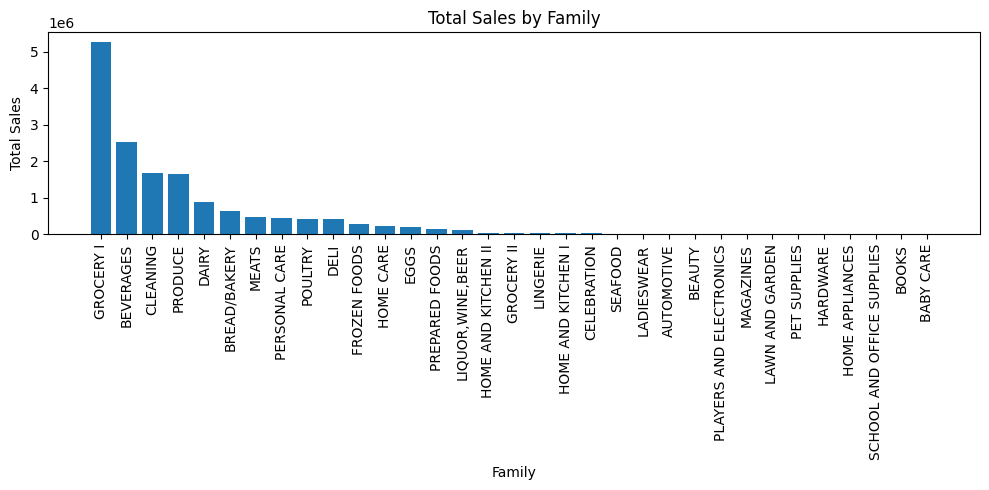

In [15]:
df = sales_df.groupby('family')[['sales']].sum()
df = df.sort_values(by='sales', ascending=False)

plt.figure(figsize=(10,5))
bars=plt.bar(df.index, df['sales'])

plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Family')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

print(df.head())

In [16]:
sales_df = sales_df[sales_df['family']=='BEVERAGES']

C:\Users\andyp\AppData\Local\Temp\ipykernel_35772\3286099896.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df.corr()


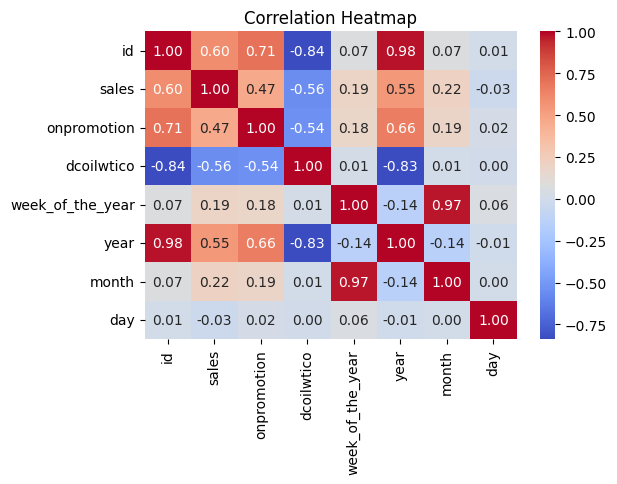

In [17]:
# Heatmap of correlation
df = sales_df
pearson_corr = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = sales_df
temp=df.groupby('weekdays')[['date','family','sales','onpromotion','dcoilwtico']].count().reindex(weekday_order)
# temp = temp.div(33).astype(int)
temp

#melihat dari data ini , family, sales, onpromotion ada datanya , sedangkan dcoilwtico banyak missing data, dan selalu kosong pada saturday dan sunday

date  family  sales  onpromotion  dcoilwtico
weekdays                                               
Monday      241     241    241          241         218
Tuesday     242     242    242          242         240
Wednesday   240     240    240          240         239
Thursday    240     240    240          240         234
Friday      240     240    240          240         232
Saturday    241     241    241          241           0
Sunday      240     240    240          240           0

## Insert Missing Date

In [19]:
min_date = sales_df['date'].min()
max_date = sales_df['date'].max()
print(f'min_date={min_date}')
print(f'max_date={max_date}')


tanggalan = pd.date_range(start=min_date, end=max_date, freq='D')
print(tanggalan)

# Find the missing dates by comparing the full range with the existing dates
missing_dates = tanggalan.difference(sales_df['date'])

print()
print(f'missing_dates = {missing_dates}')

min_date=2013-01-01 00:00:00
max_date=2017-08-15 00:00:00
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

missing_dates = DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [20]:
temp = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp['date']=pd.to_datetime('2013-12-25')
temp.loc[:, 'date'] = pd.to_datetime('2013-12-25')

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp2['date']=pd.to_datetime('2014-12-25')
temp2.loc[:, 'date'] = pd.to_datetime('2014-12-25')

temp = pd.concat([temp, temp2])

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp2['date']=pd.to_datetime('2015-12-25')
temp2.loc[:, 'date'] = pd.to_datetime('2015-12-25')
temp = pd.concat([temp, temp2])

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
# temp2['date']=pd.to_datetime('2016-12-25')
temp2.loc[:, 'date'] = pd.to_datetime('2016-12-25')
temp = pd.concat([temp, temp2], ignore_index=True)


sales_df = pd.concat([sales_df, temp], ignore_index=True)



C:\Users\andyp\AppData\Local\Temp\ipykernel_35772\4006493657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'date'] = pd.to_datetime('2013-12-25')
C:\Users\andyp\AppData\Local\Temp\ipykernel_35772\4006493657.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp.loc[:, 'date'] = pd.to_datetime('2013-12-25')
C:\Users\andyp\AppData\Local\Temp\ipykernel_35772\4006493657.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [21]:
#sorting the dataframe
sales_df = sales_df.sort_values(by=['date', 'family']).reset_index(drop=True)
sales_df=sales_df.sort_values(by='date')

## Creating Dummy Variable (separating date components)

In [22]:
sales_df['weekdays'] = sales_df['date'].dt.day_name()  # Weekday name (e.g., 'Monday')
sales_df['week_of_the_year'] = sales_df['date'].dt.isocalendar().week  # Week of the year
sales_df['year'] = sales_df['date'].dt.year  # Year
sales_df['month'] = sales_df['date'].dt.month  # Month
sales_df['day'] = sales_df['date'].dt.day  # Day of the month

In [23]:
df=sales_df[(sales_df['month']==1) & (sales_df['day']==1)]
print(df) 
#tahun baru 
#toko libur, promo libur, harga minyak kosong

           id       date     family  sales  onpromotion  dcoilwtico  \
0        1455 2013-01-01  BEVERAGES    0.0            0         NaN   
365    650103 2014-01-01  BEVERAGES    0.0            0         NaN   
730   1298751 2015-01-01  BEVERAGES    0.0            0         NaN   
1095  1947399 2016-01-01  BEVERAGES    0.0            0         NaN   
1461  2597829 2017-01-01  BEVERAGES    0.0            0         NaN   

       weekdays  week_of_the_year  year  month  day  
0       Tuesday                 1  2013      1    1  
365   Wednesday                 1  2014      1    1  
730    Thursday                 1  2015      1    1  
1095     Friday                53  2016      1    1  
1461     Sunday                52  2017      1    1  


In [24]:
df=sales_df[(sales_df['month']==12) & (sales_df['day']==31)]
print(df) 
#akhir tahun tetap buka

           id       date     family   sales  onpromotion  dcoilwtico  \
364    648321 2013-12-31  BEVERAGES  1268.0            0       98.17   
729   1296969 2014-12-31  BEVERAGES  3298.0            4       53.45   
1094  1945617 2015-12-31  BEVERAGES  2672.0           22       37.13   
1460  2596047 2016-12-31  BEVERAGES  2985.0           70         NaN   

       weekdays  week_of_the_year  year  month  day  
364     Tuesday                 1  2013     12   31  
729   Wednesday                 1  2014     12   31  
1094   Thursday                53  2015     12   31  
1460   Saturday                52  2016     12   31  


In [25]:
df=sales_df[(sales_df['month']==12) & (sales_df['day']==25)]
print(df) 
#natal libur
#toko libur, promo libur, harga minyak kosong

        id       date     family  sales  onpromotion  dcoilwtico   weekdays  \
358   1455 2013-12-25  BEVERAGES    0.0            0         NaN  Wednesday   
723   1455 2014-12-25  BEVERAGES    0.0            0         NaN   Thursday   
1088  1455 2015-12-25  BEVERAGES    0.0            0         NaN     Friday   
1454  1455 2016-12-25  BEVERAGES    0.0            0         NaN     Sunday   

      week_of_the_year  year  month  day  
358                 52  2013     12   25  
723                 52  2014     12   25  
1088                52  2015     12   25  
1454                51  2016     12   25  


## Creating Dummy Variable (Weekend and Holiday)

In [26]:
sales_df['isWeekend'] = sales_df['weekdays'].isin(['Saturday', 'Sunday']).astype(int)
sales_df['isHoliday'] = ((sales_df['month'] == 12) & (sales_df['day']== 25)).astype(int)
sales_df['isHoliday'] = sales_df['isHoliday'] | ((sales_df['date'].dt.month == 1) & (sales_df['date'].dt.day == 1)).astype(int)

In [27]:
df=sales_df[(sales_df['isWeekend']==1) ]
print(df) 
#weekend tetap jualan
# info harga oil kosong

           id       date     family   sales  onpromotion  dcoilwtico  \
4        8583 2013-01-05  BEVERAGES   912.0            0         NaN   
5       10365 2013-01-06  BEVERAGES  1124.0            0         NaN   
11      21057 2013-01-12  BEVERAGES   923.0            0         NaN   
12      22839 2013-01-13  BEVERAGES  1114.0            0         NaN   
18      33531 2013-01-19  BEVERAGES   794.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1671  2972049 2017-07-30  BEVERAGES  2850.0           30         NaN   
1677  2982741 2017-08-05  BEVERAGES  2164.0            9         NaN   
1678  2984523 2017-08-06  BEVERAGES  2166.0           11         NaN   
1684  2995215 2017-08-12  BEVERAGES  1353.0            6         NaN   
1685  2996997 2017-08-13  BEVERAGES  1838.0            9         NaN   

      weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  
4     Saturday                 1  2013      1    5          

In [28]:
sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1455 2013-01-01  BEVERAGES     0.0            0         NaN   
1        3237 2013-01-02  BEVERAGES   947.0            0       93.14   
2        5019 2013-01-03  BEVERAGES   847.0            0       92.97   
3        6801 2013-01-04  BEVERAGES   859.0            0       93.12   
4        8583 2013-01-05  BEVERAGES   912.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993433 2017-08-11  BEVERAGES  1717.0           11       48.81   
1684  2995215 2017-08-12  BEVERAGES  1353.0            6         NaN   
1685  2996997 2017-08-13  BEVERAGES  1838.0            9         NaN   
1686  2998779 2017-08-14  BEVERAGES  1771.0           10       47.59   
1687  3000561 2017-08-15  BEVERAGES  1654.0           10       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  
0       Tuesday                 1  2013      1    1          0          1  
1     Wednesday                 1  2013      1    2          0          0  
2      Thursday                 1  2013      1    3          0          0  
3        Friday                 1  2013      1    4          0          0  
4      Saturday                 1  2013      1    5          1          0  
...         ...               ...   ...    ...  ...        ...        ...  
1683     Friday                32  2017      8   11          0          0  
1684   Saturday                32  2017      8   12          1          0  
1685     Sunday                32  2017      8   13          1          0  
1686     Monday                33  2017      8   14          0          0  
1687    Tuesday                33  2017      8   15          0          0  

[1688 rows x 13 columns]

## Handle Missing Value for dcoilwtico

In [29]:
sales_df['oil_fill']=sales_df['dcoilwtico']
sales_df['oil_fill']=sales_df['oil_fill'].interpolate(method='linear')
sales_df['oil_fill'] = sales_df['oil_fill'].fillna(method='bfill')

sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1455 2013-01-01  BEVERAGES     0.0            0         NaN   
1        3237 2013-01-02  BEVERAGES   947.0            0       93.14   
2        5019 2013-01-03  BEVERAGES   847.0            0       92.97   
3        6801 2013-01-04  BEVERAGES   859.0            0       93.12   
4        8583 2013-01-05  BEVERAGES   912.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993433 2017-08-11  BEVERAGES  1717.0           11       48.81   
1684  2995215 2017-08-12  BEVERAGES  1353.0            6         NaN   
1685  2996997 2017-08-13  BEVERAGES  1838.0            9         NaN   
1686  2998779 2017-08-14  BEVERAGES  1771.0           10       47.59   
1687  3000561 2017-08-15  BEVERAGES  1654.0           10       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
0       Tuesday                 1  2013      1    1          0          1   
1     Wednesday                 1  2013      1    2          0          0   
2      Thursday                 1  2013      1    3          0          0   
3        Friday                 1  2013      1    4          0          0   
4      Saturday                 1  2013      1    5          1          0   
...         ...               ...   ...    ...  ...        ...        ...   
1683     Friday                32  2017      8   11          0          0   
1684   Saturday                32  2017      8   12          1          0   
1685     Sunday                32  2017      8   13          1          0   
1686     Monday                33  2017      8   14          0          0   
1687    Tuesday                33  2017      8   15          0          0   

       oil_fill  
0     93.140000  
1     93.140000  
2     92.970000  
3     93.120000  
4     93.146667  
...         ...  
1683  48.810000  
1684  48.403333  
1685  47.996667  
1686  47.590000  
1687  47.570000  

[1688 rows x 14 columns]

In [30]:
print(sales_df['oil_fill'].isna().sum())

sales_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 1687
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1688 non-null   int64         
 1   date              1688 non-null   datetime64[ns]
 2   family            1688 non-null   object        
 3   sales             1688 non-null   float64       
 4   onpromotion       1688 non-null   int64         
 5   dcoilwtico        1163 non-null   float64       
 6   weekdays          1688 non-null   object        
 7   week_of_the_year  1688 non-null   UInt32        
 8   year              1688 non-null   int64         
 9   month             1688 non-null   int64         
 10  day               1688 non-null   int64         
 11  isWeekend         1688 non-null   int32         
 12  isHoliday         1688 non-null   int32         
 13  oil_fill          1688 non-null   float64       
dtypes: UInt32(1), datetime

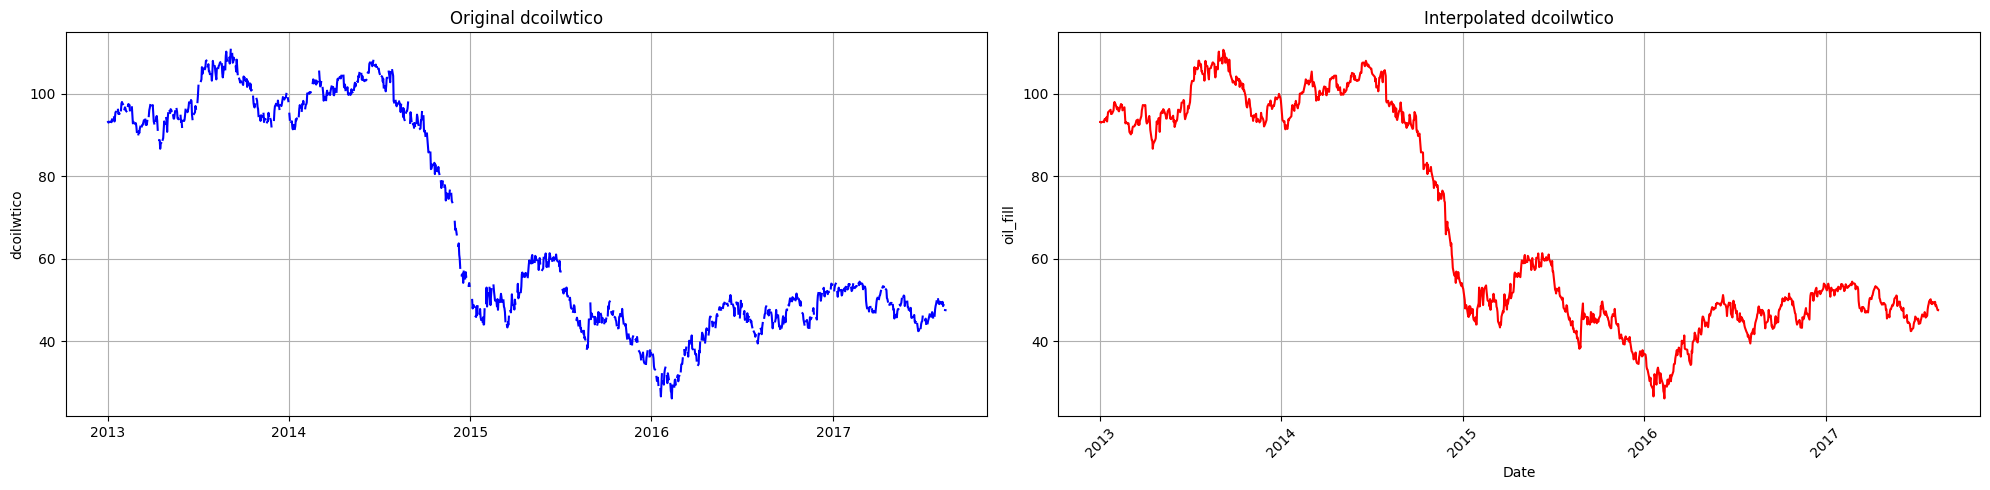

In [31]:

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

axes[0].plot(sales_df['date'], sales_df['dcoilwtico'], color='b')
axes[0].set_title('Original dcoilwtico')
axes[0].set_ylabel('dcoilwtico')
axes[0].grid(True)

axes[1].plot(sales_df['date'], sales_df['oil_fill'],  color='r')
axes[1].set_title('Interpolated dcoilwtico')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('oil_fill')
axes[1].grid(True)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [32]:
sales_df.sample(n=21 , random_state=42)

id       date     family   sales  onpromotion  dcoilwtico  \
1251  2225391 2016-06-05  BEVERAGES  2460.0           37         NaN   
494    879981 2014-05-10  BEVERAGES  1083.0            0         NaN   
203    363201 2013-07-23  BEVERAGES   628.0            0      107.13   
479    853251 2014-04-25  BEVERAGES   661.0            0      100.85   
886   1576743 2015-06-06  BEVERAGES  2554.0            8         NaN   
1134  2016897 2016-02-09  BEVERAGES  1417.0           27       27.96   
1211  2154111 2016-04-26  BEVERAGES  1545.0           19       42.52   
427    760587 2014-03-04  BEVERAGES  1734.0            0      103.64   
1277  2271723 2016-07-01  BEVERAGES  1751.0           12       49.02   
1633  2904333 2017-06-22  BEVERAGES  1396.0           25       42.53   
173    309741 2013-06-23  BEVERAGES  1023.0            0         NaN   
745   1325481 2015-01-16  BEVERAGES   651.0            1       48.49   
986   1754943 2015-09-14  BEVERAGES  2257.0            9       44.07   
1398  2487345 2016-10-30  BEVERAGES  2436.0           47         NaN   
1667  2964921 2017-07-26  BEVERAGES  1981.0           23       48.58   
1230  2187969 2016-05-15  BEVERAGES  2538.0           23         NaN   
1100  1956309 2016-01-06  BEVERAGES  2299.0            6       33.97   
785   1396761 2015-02-25  BEVERAGES   663.0            0       50.25   
857   1525065 2015-05-08  BEVERAGES   843.0            3       59.41   
1507  2679801 2017-02-16  BEVERAGES  1387.0           11       53.41   
135    242025 2013-05-16  BEVERAGES   587.0            0       94.85   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
1251     Sunday                22  2016      6    5          1          0   
494    Saturday                19  2014      5   10          1          0   
203     Tuesday                30  2013      7   23          0          0   
479      Friday                17  2014      4   25          0          0   
886    Saturday                23  2015      6    6          1          0   
1134    Tuesday                 6  2016      2    9          0          0   
1211    Tuesday                17  2016      4   26          0          0   
427     Tuesday                10  2014      3    4          0          0   
1277     Friday                26  2016      7    1          0          0   
1633   Thursday                25  2017      6   22          0          0   
173      Sunday                25  2013      6   23          1          0   
745      Friday                 3  2015      1   16          0          0   
986      Monday                38  2015      9   14          0          0   
1398     Sunday                43  2016     10   30          1          0   
1667  Wednesday                30  2017      7   26          0          0   
1230     Sunday                19  2016      5   15          1          0   
1100  Wednesday                 1  2016      1    6          0          0   
785   Wednesday                 9  2015      2   25          0          0   
857      Friday                19  2015      5    8          0          0   
1507   Thursday                 7  2017      2   16          0          0   
135    Thursday                20  2013      5   16          0          0   

      oil_fill  
1251     49.37  
494     100.51  
203     107.13  
479     100.85  
886      58.79  
1134     27.96  
1211     42.52  
427     103.64  
1277     49.02  
1633     42.53  
173      94.65  
745      48.49  
986      44.07  
1398     47.46  
1667     48.58  
1230     47.22  
1100     33.97  
785      50.25  
857      59.41  
1507     53.41  
135      94.85

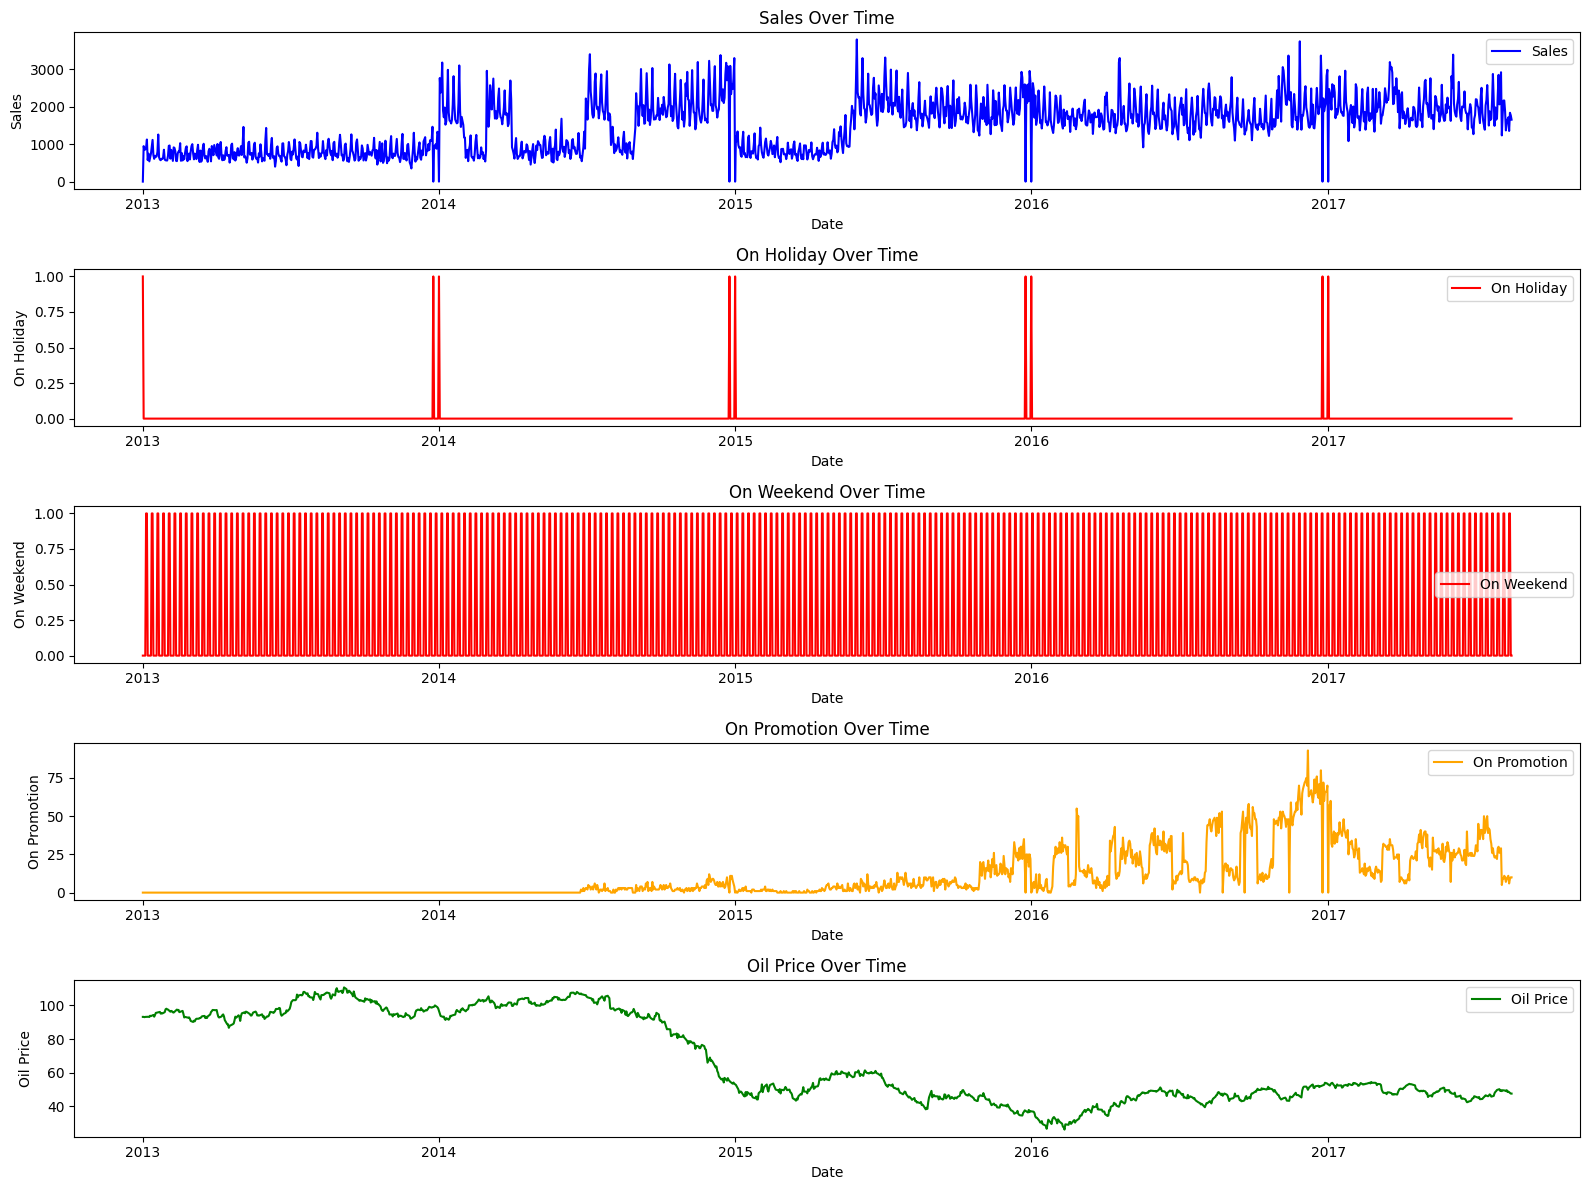

In [33]:
sales_df=sales_df.sort_values(by='date')
df = sales_df
# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 12))


plt.subplot(5, 1, 1)
plt.plot(df['date'], df['sales'], color='blue', label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(df['date'], df['isHoliday'], color='red', label='On Holiday')
plt.xlabel('Date')
plt.ylabel('On Holiday')
plt.title('On Holiday Over Time')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(df['date'], df['isWeekend'], color='red', label='On Weekend')
plt.xlabel('Date')
plt.ylabel('On Weekend')
plt.title('On Weekend Over Time')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(df['date'], df['onpromotion'], color='orange', label='On Promotion')
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df['date'], df['oil_fill'], color='green', label='Oil Price')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.legend()

plt.tight_layout()
plt.show()

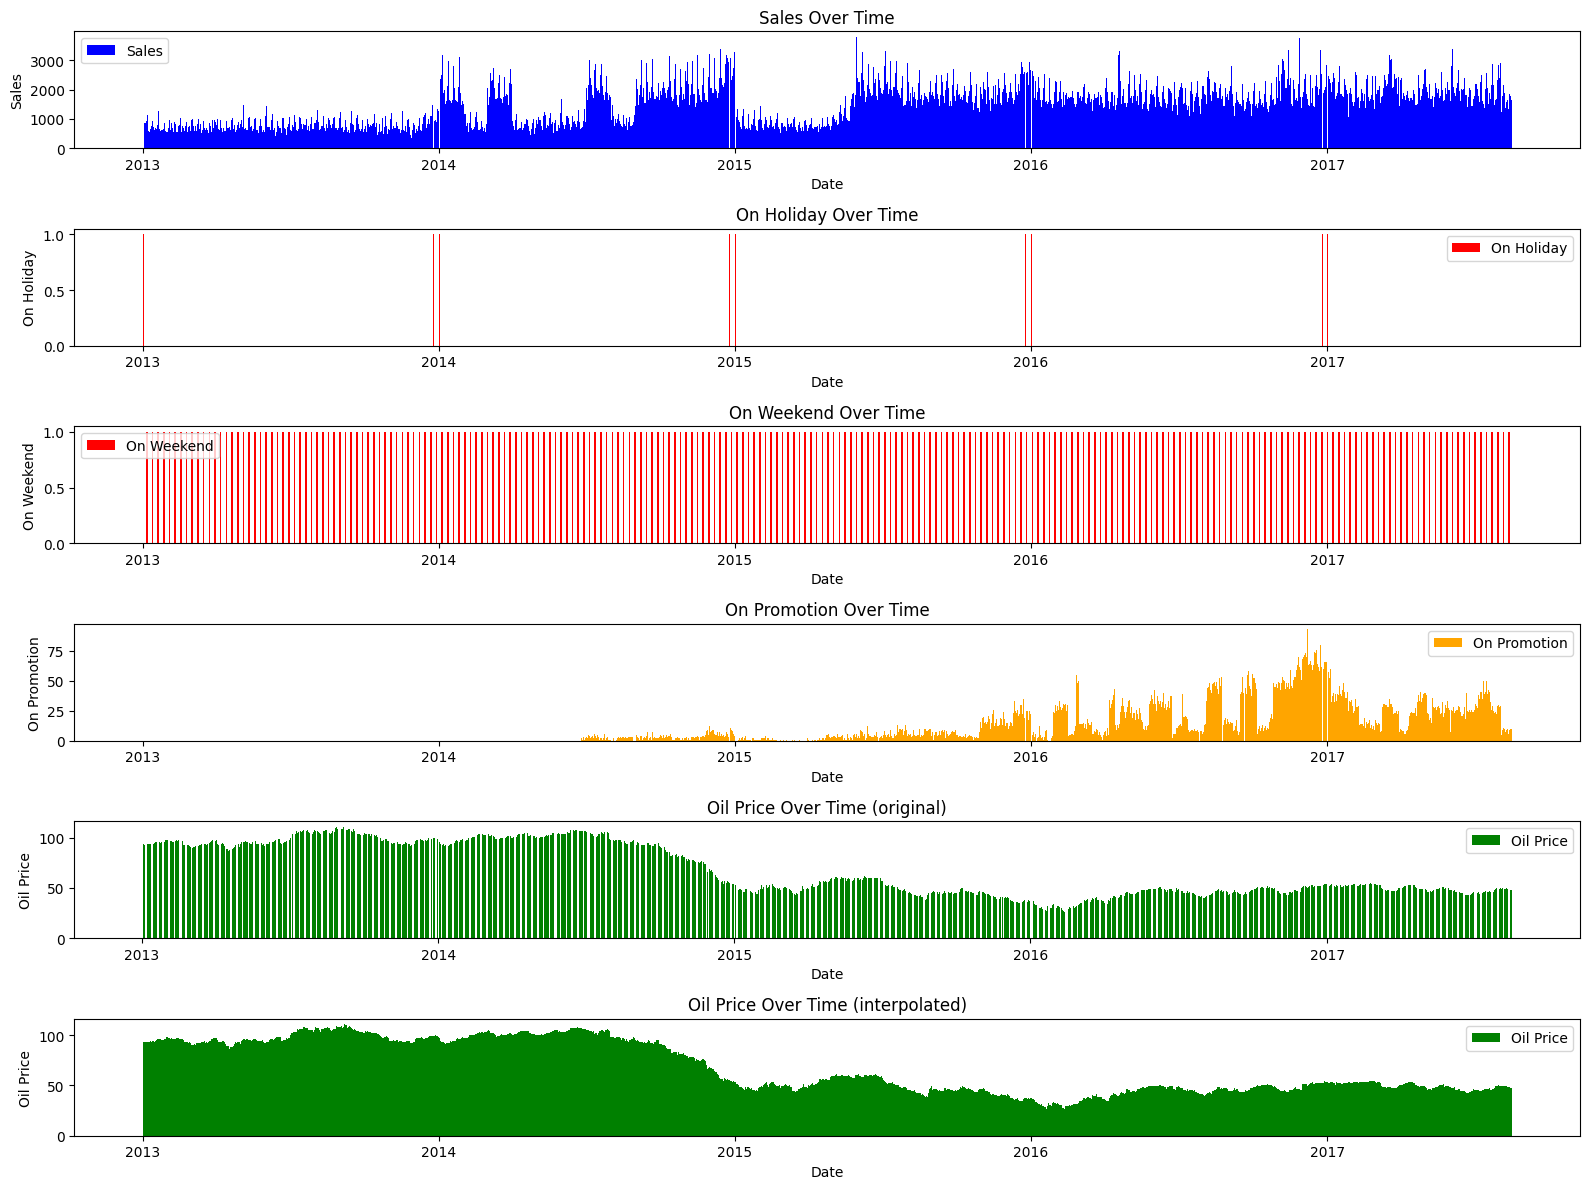

In [34]:

df = sales_df
# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 12))


plt.subplot(6, 1, 1)
plt.bar(df['date'], df['sales'], color='blue', label='Sales', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

plt.subplot(6, 1, 2)
plt.bar(df['date'], df['isHoliday'], color='red', label='On Holiday', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Holiday')
plt.title('On Holiday Over Time')
plt.legend()

plt.subplot(6, 1, 3)
plt.bar(df['date'], df['isWeekend'], color='red', label='On Weekend', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Weekend')
plt.title('On Weekend Over Time')
plt.legend()

plt.subplot(6, 1, 4)
plt.bar(df['date'], df['onpromotion'], color='orange', label='On Promotion', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(6, 1, 5)
plt.bar(df['date'], df['dcoilwtico'], color='green', label='Oil Price', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time (original)')
plt.legend()

plt.subplot(6, 1, 6)
plt.bar(df['date'], df['oil_fill'], color='green', label='Oil Price', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time (interpolated)')
plt.legend()

plt.tight_layout()
plt.show()

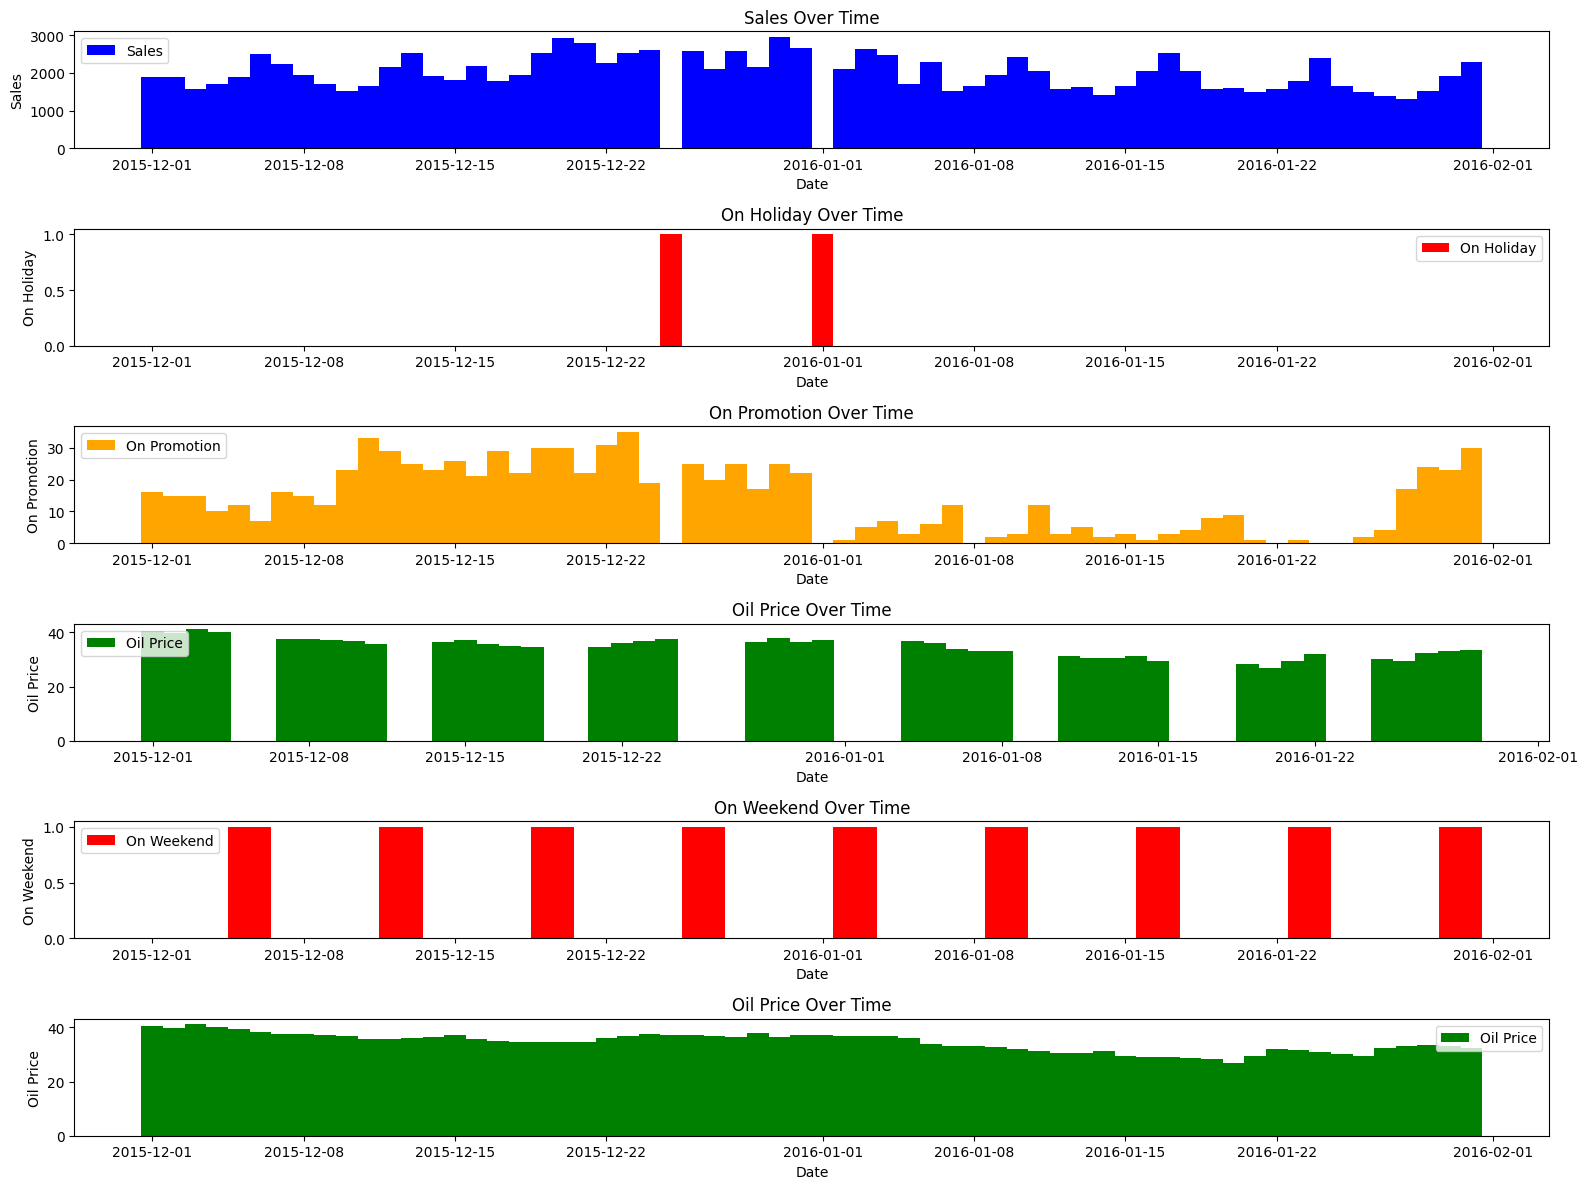

In [35]:
#ingin zooom in sedikit dari grafik di atas

sales_df=sales_df.sort_values(by='date')
df = sales_df
df=df[df['date']>=pd.to_datetime('2015-12-01')]
df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 12))


plt.subplot(6, 1, 1)
plt.bar(df['date'], df['sales'], color='blue', label='Sales', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()

plt.subplot(6, 1, 2)
plt.bar(df['date'], df['isHoliday'], color='red', label='On Holiday', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('On Holiday')
plt.title('On Holiday Over Time')
plt.legend()

plt.subplot(6, 1, 3)
plt.bar(df['date'], df['onpromotion'], color='orange', label='On Promotion', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(6, 1, 4)
plt.bar(df['date'], df['dcoilwtico'], color='green', label='Oil Price', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.legend()

plt.subplot(6, 1, 5)
plt.bar(df['date'], df['isWeekend'], color='red', label='On Weekend', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('On Weekend')
plt.title('On Weekend Over Time')
plt.legend()

plt.subplot(6, 1, 6)
plt.bar(df['date'], df['oil_fill'], color='green', label='Oil Price', align='center', width=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.legend()

plt.tight_layout()
plt.show()

## Correlation Check

In [36]:
correlation_sales = sales_df[['sales', 'onpromotion']].corr()
print(f'correlation_sales:\n{correlation_sales}')

correlation_sales = sales_df[['sales', 'oil_fill']].corr()
print(f'correlation_oil:\n{correlation_sales}')


correlation_sales:
                sales  onpromotion
sales        1.000000     0.467944
onpromotion  0.467944     1.000000
correlation_oil:
             sales  oil_fill
sales     1.000000 -0.498858
oil_fill -0.498858  1.000000


In [37]:
pearson_corr = sales_df[['sales', 'onpromotion', 'dcoilwtico','oil_fill','isHoliday', 'isWeekend']].corr(method='pearson')
spearman_corr = sales_df[['sales', 'onpromotion', 'dcoilwtico','oil_fill','isHoliday', 'isWeekend']].corr(method='spearman')

# Print correlation values
print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

Pearson Correlation:
                 sales  onpromotion  dcoilwtico  oil_fill  isHoliday  isWeekend
sales        1.000000     0.467944   -0.557619 -0.498858  -0.163532   0.290683
onpromotion  0.467944     1.000000   -0.538385 -0.538569  -0.050285   0.022237
dcoilwtico  -0.557619    -0.538385    1.000000  1.000000        NaN        NaN
oil_fill    -0.498858    -0.538569    1.000000  1.000000  -0.010776  -0.000536
isHoliday   -0.163532    -0.050285         NaN -0.010776   1.000000  -0.010264
isWeekend    0.290683     0.022237         NaN -0.000536  -0.010264   1.000000

Spearman Correlation:
                 sales  onpromotion  dcoilwtico  oil_fill  isHoliday  isWeekend
sales        1.000000     0.665324   -0.480971 -0.472720  -0.126135   0.298973
onpromotion  0.665324     1.000000   -0.722908 -0.716599  -0.083327   0.014160
dcoilwtico  -0.480971    -0.722908    1.000000  1.000000        NaN        NaN
oil_fill    -0.472720    -0.716599    1.000000  1.000000  -0.003890  -0.000751
isHoli

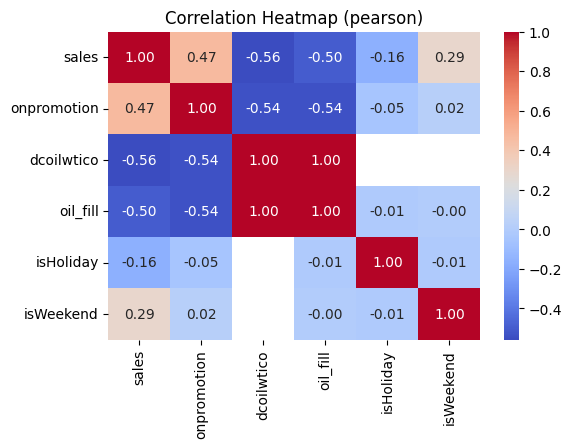

In [38]:
# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (pearson)")
plt.show()

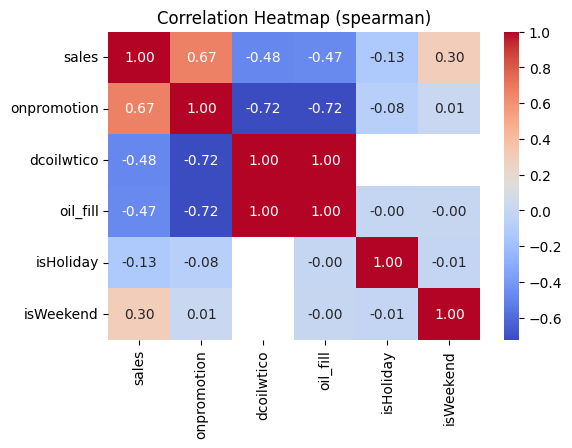

In [39]:
# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (spearman)")
plt.show()

In [40]:
df.columns

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill'],
      dtype='object')

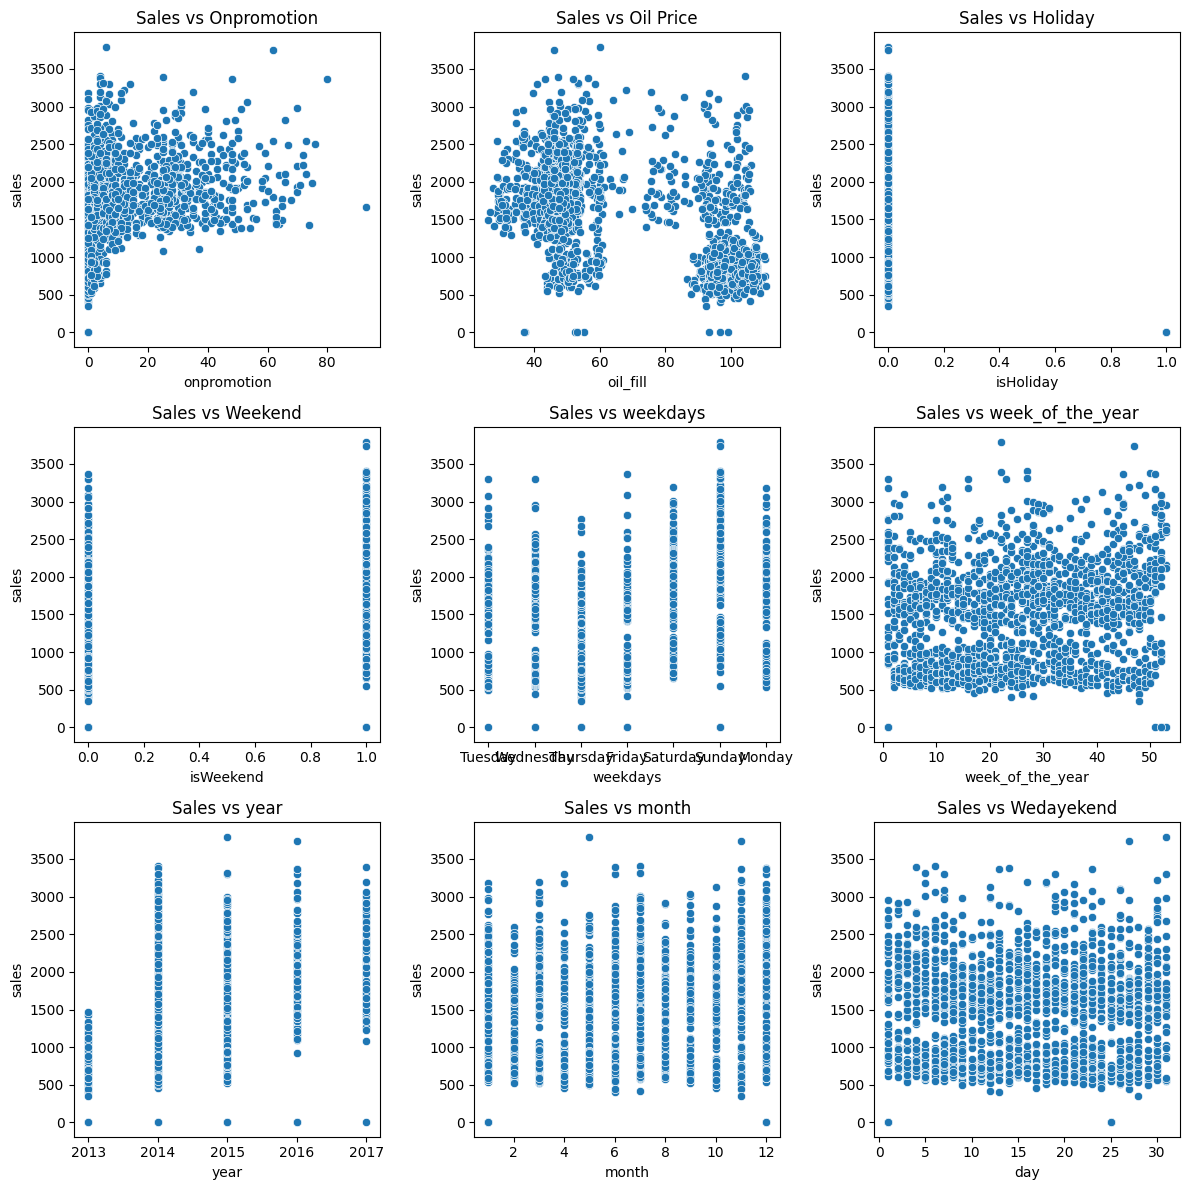

In [41]:
# Scatter plots
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.scatterplot(data=sales_df, x='onpromotion', y='sales')
plt.title("Sales vs Onpromotion")

plt.subplot(3, 3, 2)
sns.scatterplot(data=sales_df, x='oil_fill', y='sales')
plt.title("Sales vs Oil Price")

plt.subplot(3, 3, 3)
sns.scatterplot(data=sales_df, x='isHoliday', y='sales')
plt.title("Sales vs Holiday")

plt.subplot(3, 3, 4)
sns.scatterplot(data=sales_df, x='isWeekend', y='sales')
plt.title("Sales vs Weekend")

plt.subplot(3, 3, 5)
sns.scatterplot(data=sales_df, x='weekdays', y='sales')
plt.title("Sales vs weekdays")

plt.subplot(3, 3, 6)
sns.scatterplot(data=sales_df, x='week_of_the_year', y='sales')
plt.title("Sales vs week_of_the_year")

plt.subplot(3, 3, 7)
sns.scatterplot(data=sales_df, x='year', y='sales')
plt.title("Sales vs year")

plt.subplot(3, 3, 8)
sns.scatterplot(data=sales_df, x='month', y='sales')
plt.title("Sales vs month")

plt.subplot(3, 3, 9)
sns.scatterplot(data=sales_df, x='day', y='sales')
plt.title("Sales vs Wedayekend")


plt.tight_layout()
plt.show()



In [42]:
print(f'sales_df.columns:\n{sales_df.columns}')
sales_df_selected=sales_df[['id', 'date', 'sales', 'onpromotion', 'isWeekend','isHoliday']]
print('')
print(f'sales_df_selected.columns:\n{sales_df_selected.columns}')

sales_df.columns:
Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill'],
      dtype='object')

sales_df_selected.columns:
Index(['id', 'date', 'sales', 'onpromotion', 'isWeekend', 'isHoliday'], dtype='object')


## ADF Test

In [43]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'ADF Test for {name}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:', result[4])
    
    gc='\u2713'
    rc='\u2716'
    if result[1] <= 0.05:
        print(f"{gc} {name} is STATIONARY (Reject null hypothesis)")
    else:
        print(f"{rc} {name} is NOT STATIONARY (Fail to reject null hypothesis)")
    print("-" * 50)

# Run ADF Test on Sales
adf_test(sales_df['sales'], "Sales [sales]")
adf_test(sales_df['onpromotion'], 'On Promotion [onpromotion]')

#yg di bawah ini tidak perlu , karena yg di cek stationernya cukup yang mau di
adf_test(sales_df['oil_fill'], 'oil_fill')
adf_test(sales_df['isWeekend'], 'isWeekend')
adf_test(sales_df['isHoliday'], 'isHoliday')


ADF Test for Sales [sales]
ADF Statistic: -3.9271
p-value: 0.0018
Critical Values: {'1%': -3.434283579780684, '5%': -2.863277451883613, '10%': -2.5676949772294817}
✓ Sales [sales] is STATIONARY (Reject null hypothesis)
--------------------------------------------------
ADF Test for On Promotion [onpromotion]
ADF Statistic: -2.3539
p-value: 0.1552
Critical Values: {'1%': -3.4342906911169404, '5%': -2.8632805908715726, '10%': -2.5676966486957706}
✖ On Promotion [onpromotion] is NOT STATIONARY (Fail to reject null hypothesis)
--------------------------------------------------
ADF Test for oil_fill
ADF Statistic: -0.8659
p-value: 0.7990
Critical Values: {'1%': -3.4342322039823197, '5%': -2.863254774066211, '10%': -2.5676829016514233}
✖ oil_fill is NOT STATIONARY (Fail to reject null hypothesis)
--------------------------------------------------
ADF Test for isWeekend
ADF Statistic: -1032450383434032.6250
p-value: 0.0000
Critical Values: {'1%': -3.434243762106336, '5%': -2.863259875977509, 

In [44]:
print(f'onpromotion = {sales_df.shape}')

onpromotion = (1688, 14)


In [45]:
from scipy.stats import boxcox

# sales_df['oil_fill_donpromotionifferencing'] = sales_df['onpromotion'].diff()
sales_df['onpromotion_differencing'] = sales_df['onpromotion'].diff(periods=7).fillna(0)
adf_test(sales_df['onpromotion_differencing'], 'On Promotion Differencing')

# sales_df['onpromotion_boxcox'], lam = boxcox(sales_df['onpromotion'] + 1)
# adf_test(sales_df['onpromotion_boxcox'], 'On Promotion BoxCox')

sales_df['oil_fill_differencing'] = sales_df['oil_fill'].diff(periods=7).fillna(0)
adf_test(sales_df['oil_fill_differencing'], 'On Oil Price Differencing')

# sales_df['oil_fill_boxcox'], lam = boxcox(sales_df['oil_fill'] + 1)
# adf_test(sales_df['oil_fill_boxcox'], 'On Oil Price BoxCox')



ADF Test for On Promotion Differencing
ADF Statistic: -10.6996
p-value: 0.0000
Critical Values: {'1%': -3.4342906911169404, '5%': -2.8632805908715726, '10%': -2.5676966486957706}
✓ On Promotion Differencing is STATIONARY (Reject null hypothesis)
--------------------------------------------------
ADF Test for On Oil Price Differencing
ADF Statistic: -6.6143
p-value: 0.0000
Critical Values: {'1%': -3.4342812150354276, '5%': -2.8632764080687307, '10%': -2.5676944214132233}
✓ On Oil Price Differencing is STATIONARY (Reject null hypothesis)
--------------------------------------------------


In [46]:
print(f'onpromotion = {sales_df.shape}')
sales_df.to_csv('store_BEVERAGES.csv') #bikin backup saja kalau2 nanti ada perlu

onpromotion = (1688, 16)


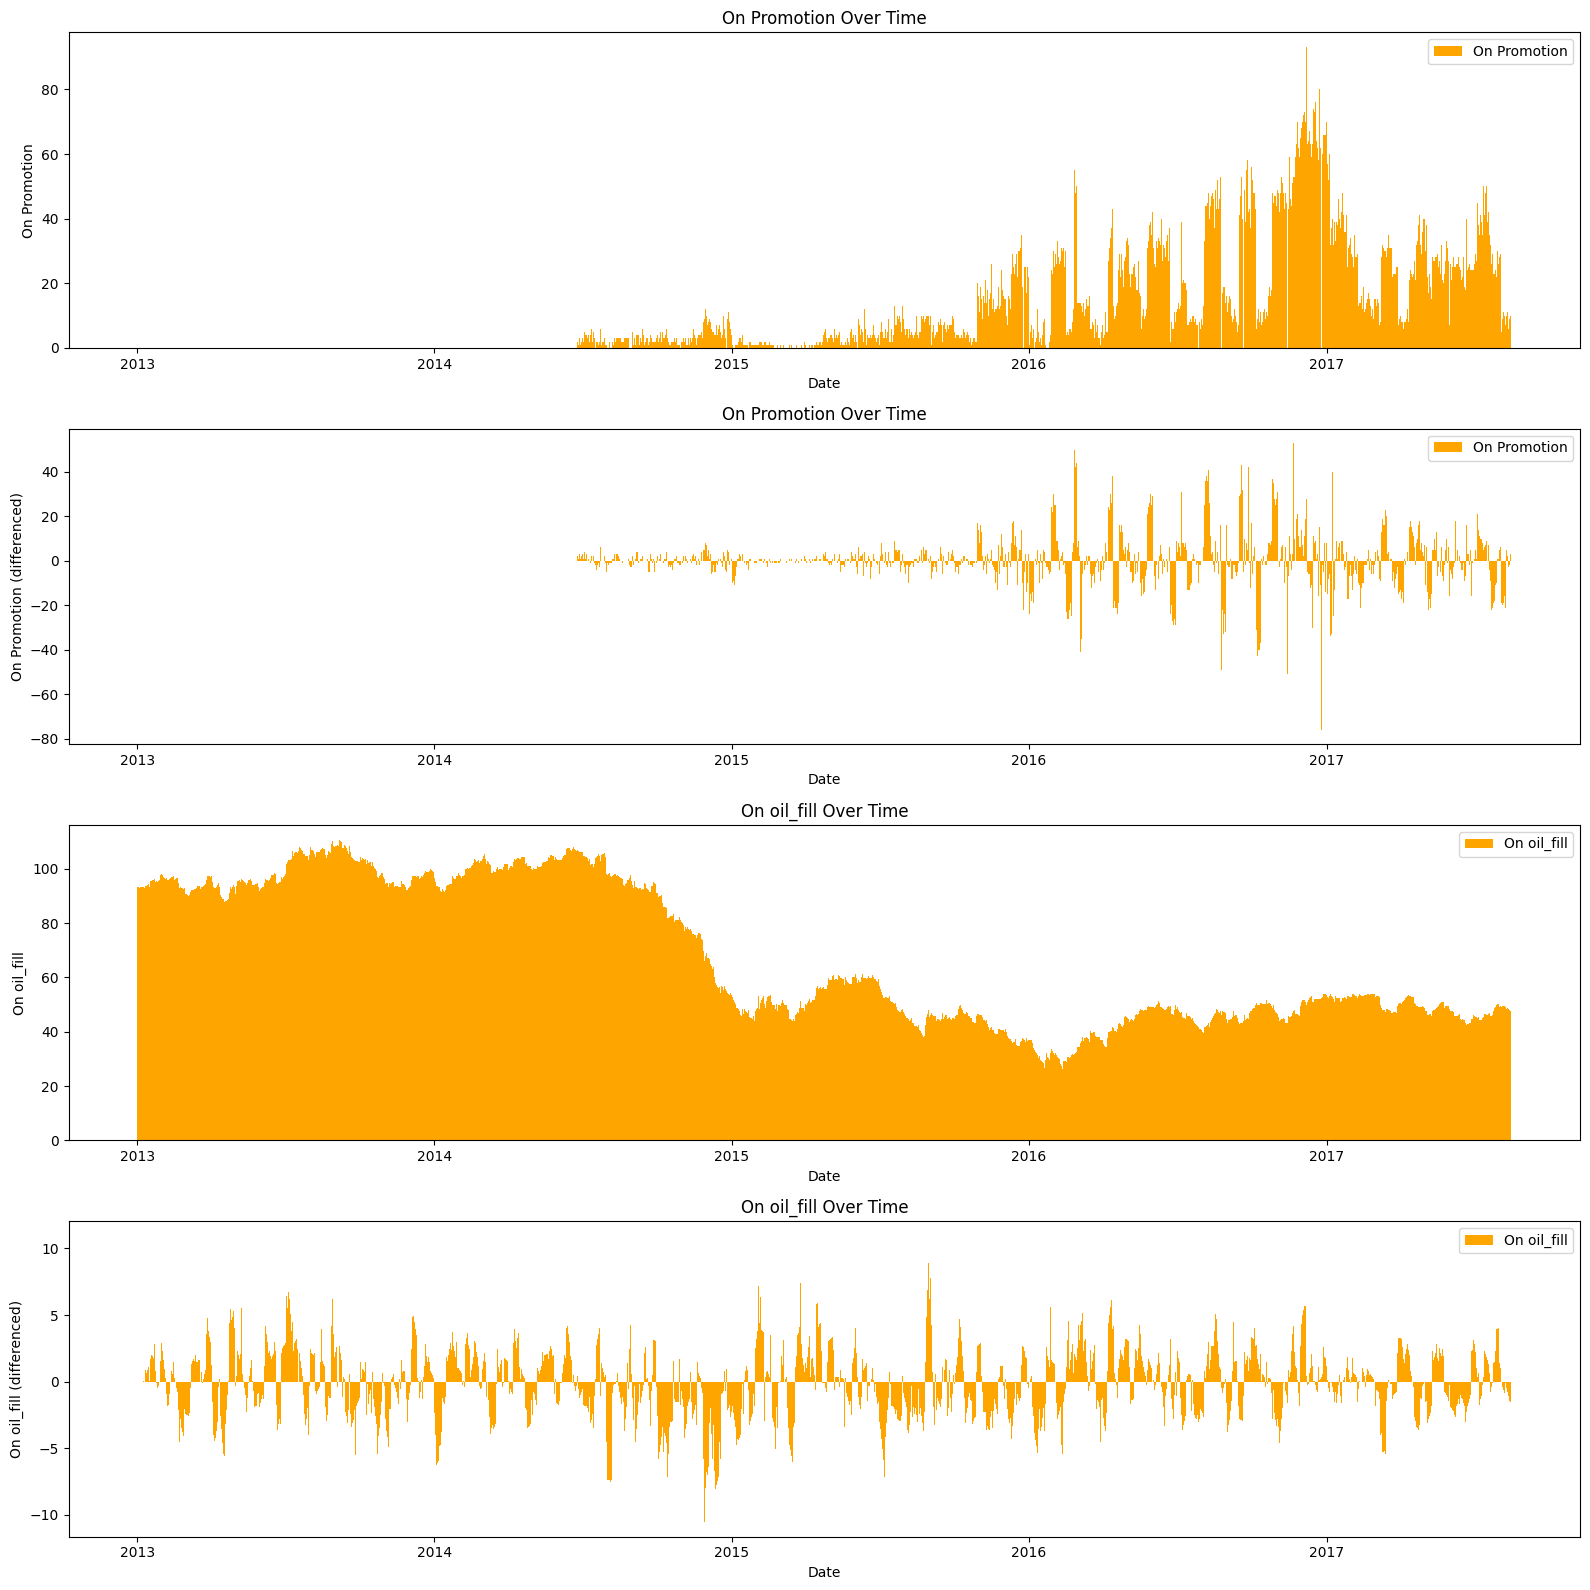

In [47]:
sales_df=sales_df.sort_values(by='date')
df = sales_df
# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


plt.figure(figsize=(16, 16))


plt.subplot(4, 1, 1)
plt.bar(df['date'], df['onpromotion'], color='orange', label='On Promotion', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion')
plt.title('On Promotion Over Time')
plt.legend()

plt.subplot(4, 1, 2)
plt.bar(df['date'], df['onpromotion_differencing'], color='orange', label='On Promotion', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On Promotion (differenced)')
plt.title('On Promotion Over Time')
plt.legend()


plt.subplot(4, 1, 3)
plt.bar(df['date'], df['oil_fill'], color='orange', label='On oil_fill', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On oil_fill')
plt.title('On oil_fill Over Time')
plt.legend()

plt.subplot(4, 1, 4)
plt.bar(df['date'], df['oil_fill_differencing'], color='orange', label='On oil_fill', align='edge', width=1)
plt.xlabel('Date')
plt.ylabel('On oil_fill (differenced)')
plt.title('On oil_fill Over Time')
plt.legend()



plt.tight_layout()
plt.show()

In [48]:
sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1455 2013-01-01  BEVERAGES     0.0            0         NaN   
1        3237 2013-01-02  BEVERAGES   947.0            0       93.14   
2        5019 2013-01-03  BEVERAGES   847.0            0       92.97   
3        6801 2013-01-04  BEVERAGES   859.0            0       93.12   
4        8583 2013-01-05  BEVERAGES   912.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993433 2017-08-11  BEVERAGES  1717.0           11       48.81   
1684  2995215 2017-08-12  BEVERAGES  1353.0            6         NaN   
1685  2996997 2017-08-13  BEVERAGES  1838.0            9         NaN   
1686  2998779 2017-08-14  BEVERAGES  1771.0           10       47.59   
1687  3000561 2017-08-15  BEVERAGES  1654.0           10       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
0       Tuesday                 1  2013      1    1          0          1   
1     Wednesday                 1  2013      1    2          0          0   
2      Thursday                 1  2013      1    3          0          0   
3        Friday                 1  2013      1    4          0          0   
4      Saturday                 1  2013      1    5          1          0   
...         ...               ...   ...    ...  ...        ...        ...   
1683     Friday                32  2017      8   11          0          0   
1684   Saturday                32  2017      8   12          1          0   
1685     Sunday                32  2017      8   13          1          0   
1686     Monday                33  2017      8   14          0          0   
1687    Tuesday                33  2017      8   15          0          0   

       oil_fill  onpromotion_differencing  oil_fill_differencing  
0     93.140000                       0.0                   0.00  
1     93.140000                       0.0                   0.00  
2     92.970000                       0.0                   0.00  
3     93.120000                       0.0                   0.00  
4     93.146667                       0.0                   0.00  
...         ...                       ...                    ...  
1683  48.810000                       2.0                  -0.76  
1684  48.403333                      -3.0                  -1.10  
1685  47.996667                      -2.0                  -1.44  
1686  47.590000                       0.0                  -1.78  
1687  47.570000                       3.0                  -1.50  

[1688 rows x 16 columns]

In [49]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 1687
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        1688 non-null   int64         
 1   date                      1688 non-null   datetime64[ns]
 2   family                    1688 non-null   object        
 3   sales                     1688 non-null   float64       
 4   onpromotion               1688 non-null   int64         
 5   dcoilwtico                1163 non-null   float64       
 6   weekdays                  1688 non-null   object        
 7   week_of_the_year          1688 non-null   UInt32        
 8   year                      1688 non-null   int64         
 9   month                     1688 non-null   int64         
 10  day                       1688 non-null   int64         
 11  isWeekend                 1688 non-null   int32         
 12  isHoliday           

## Check Seasonality

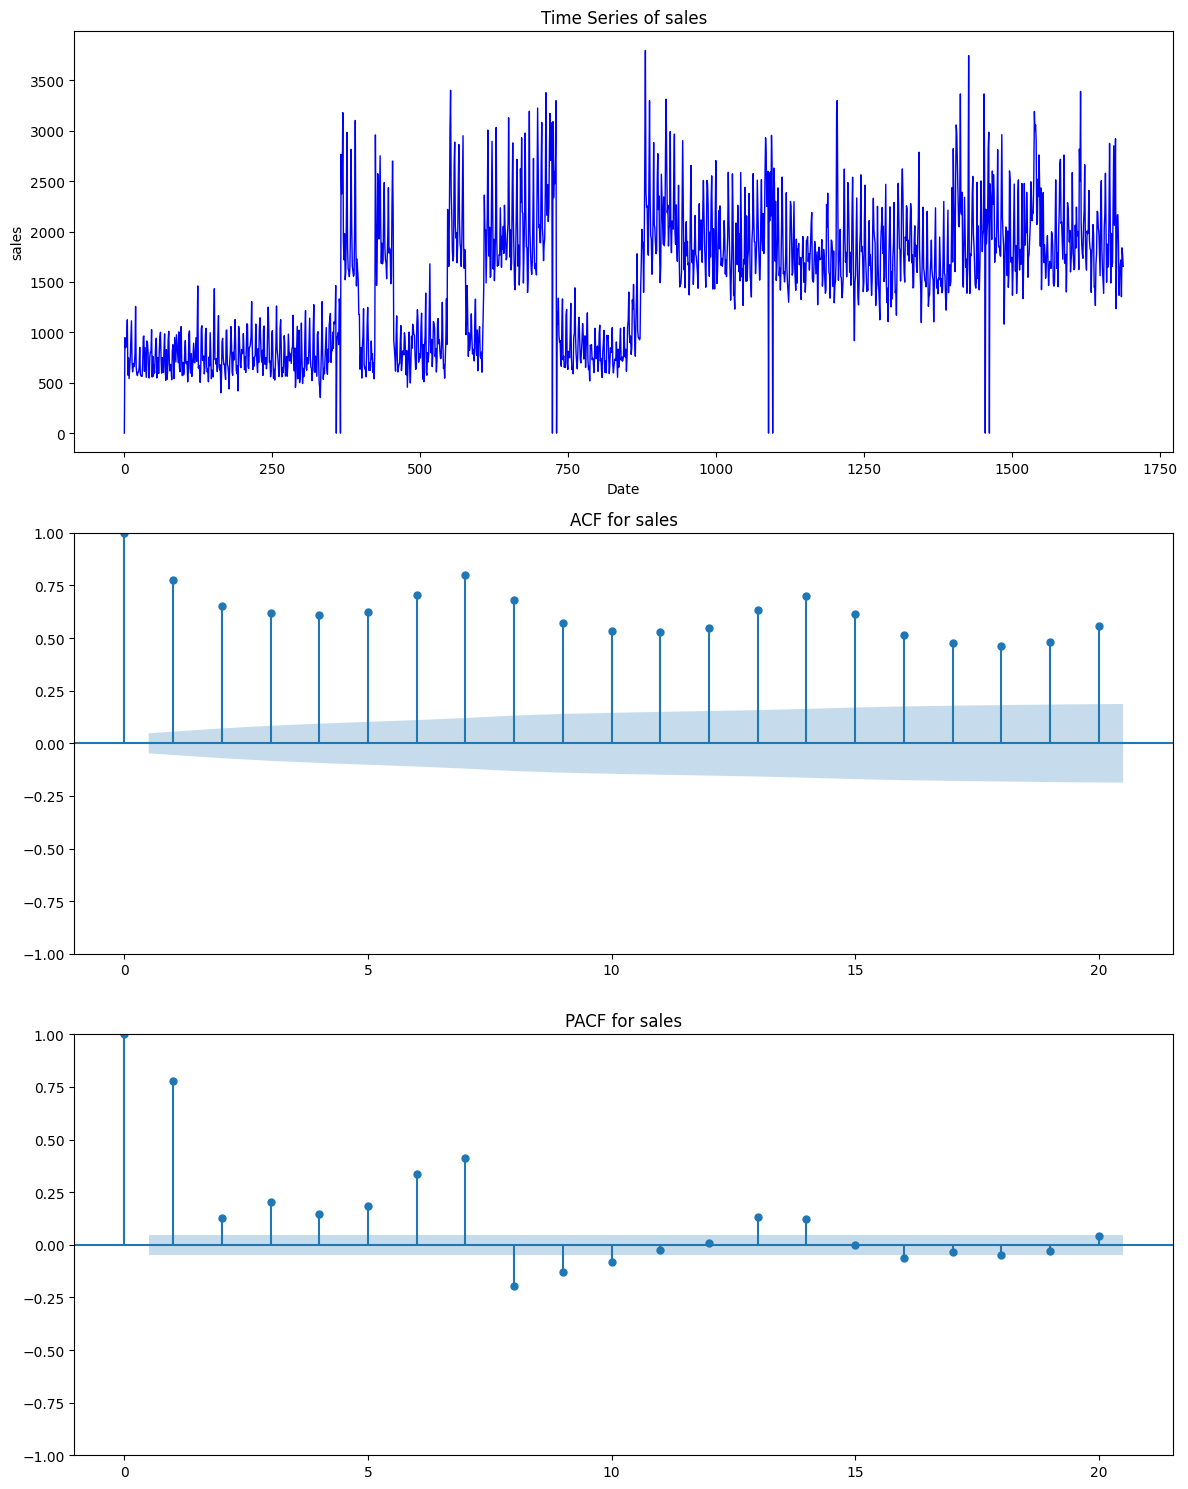

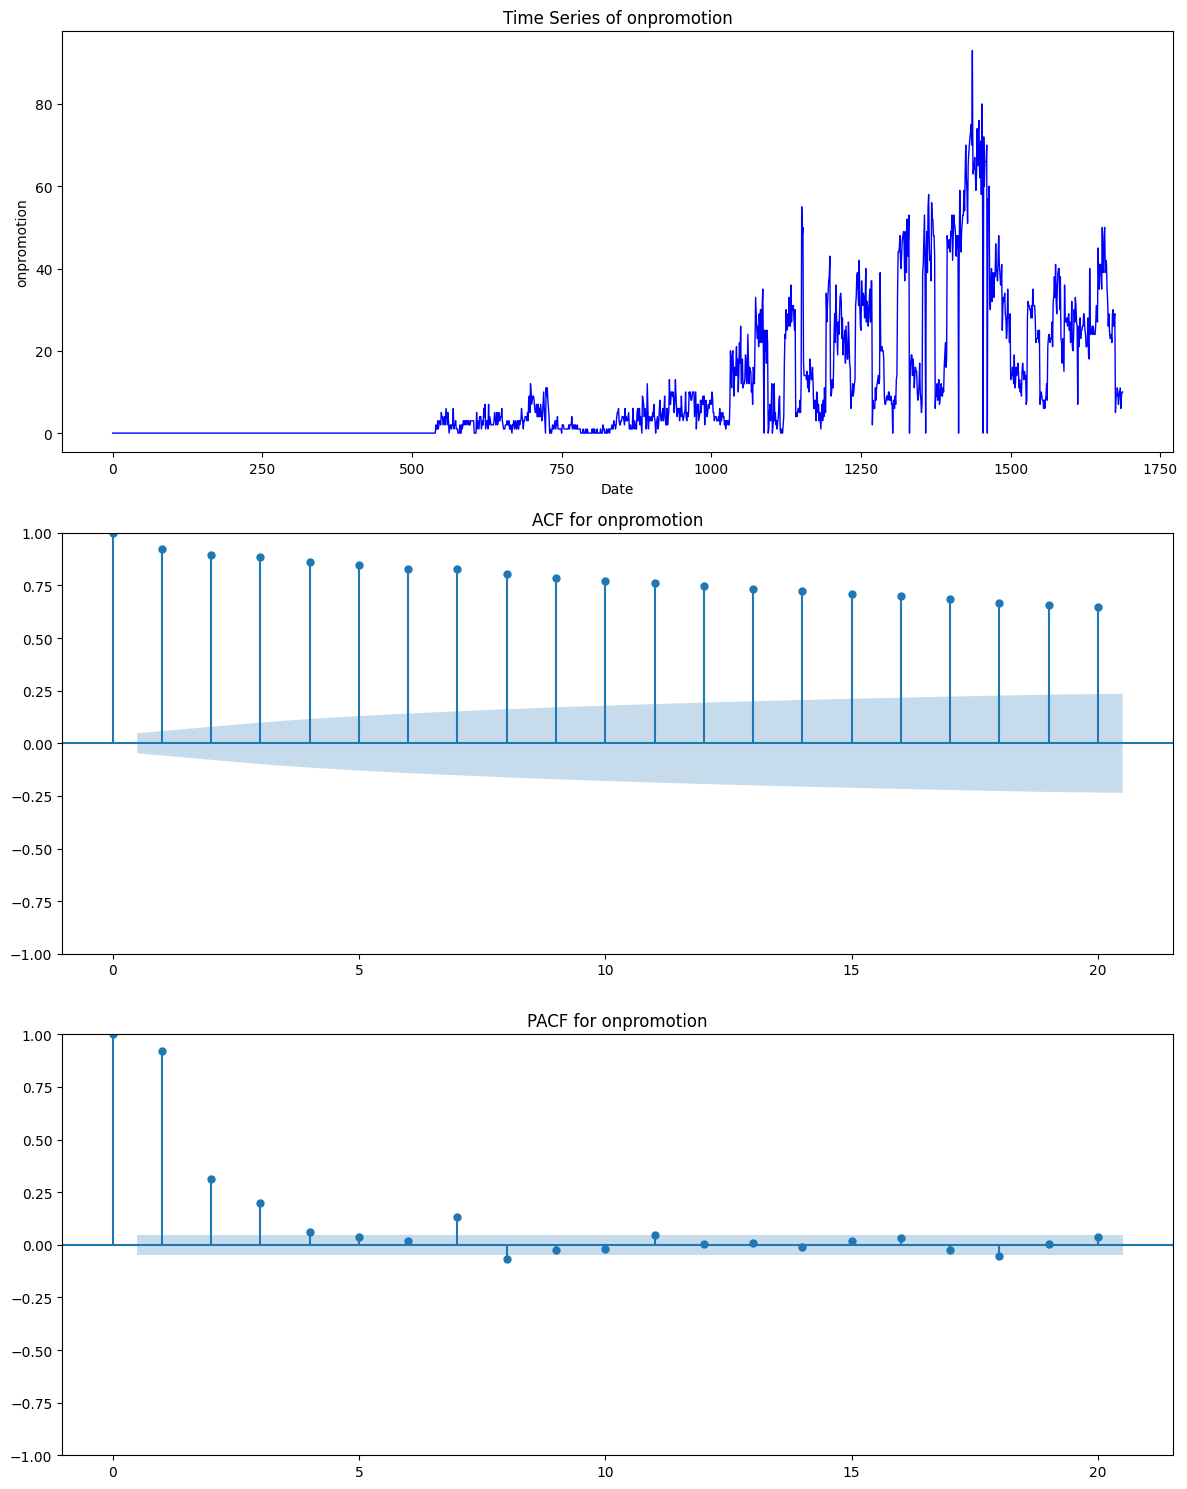

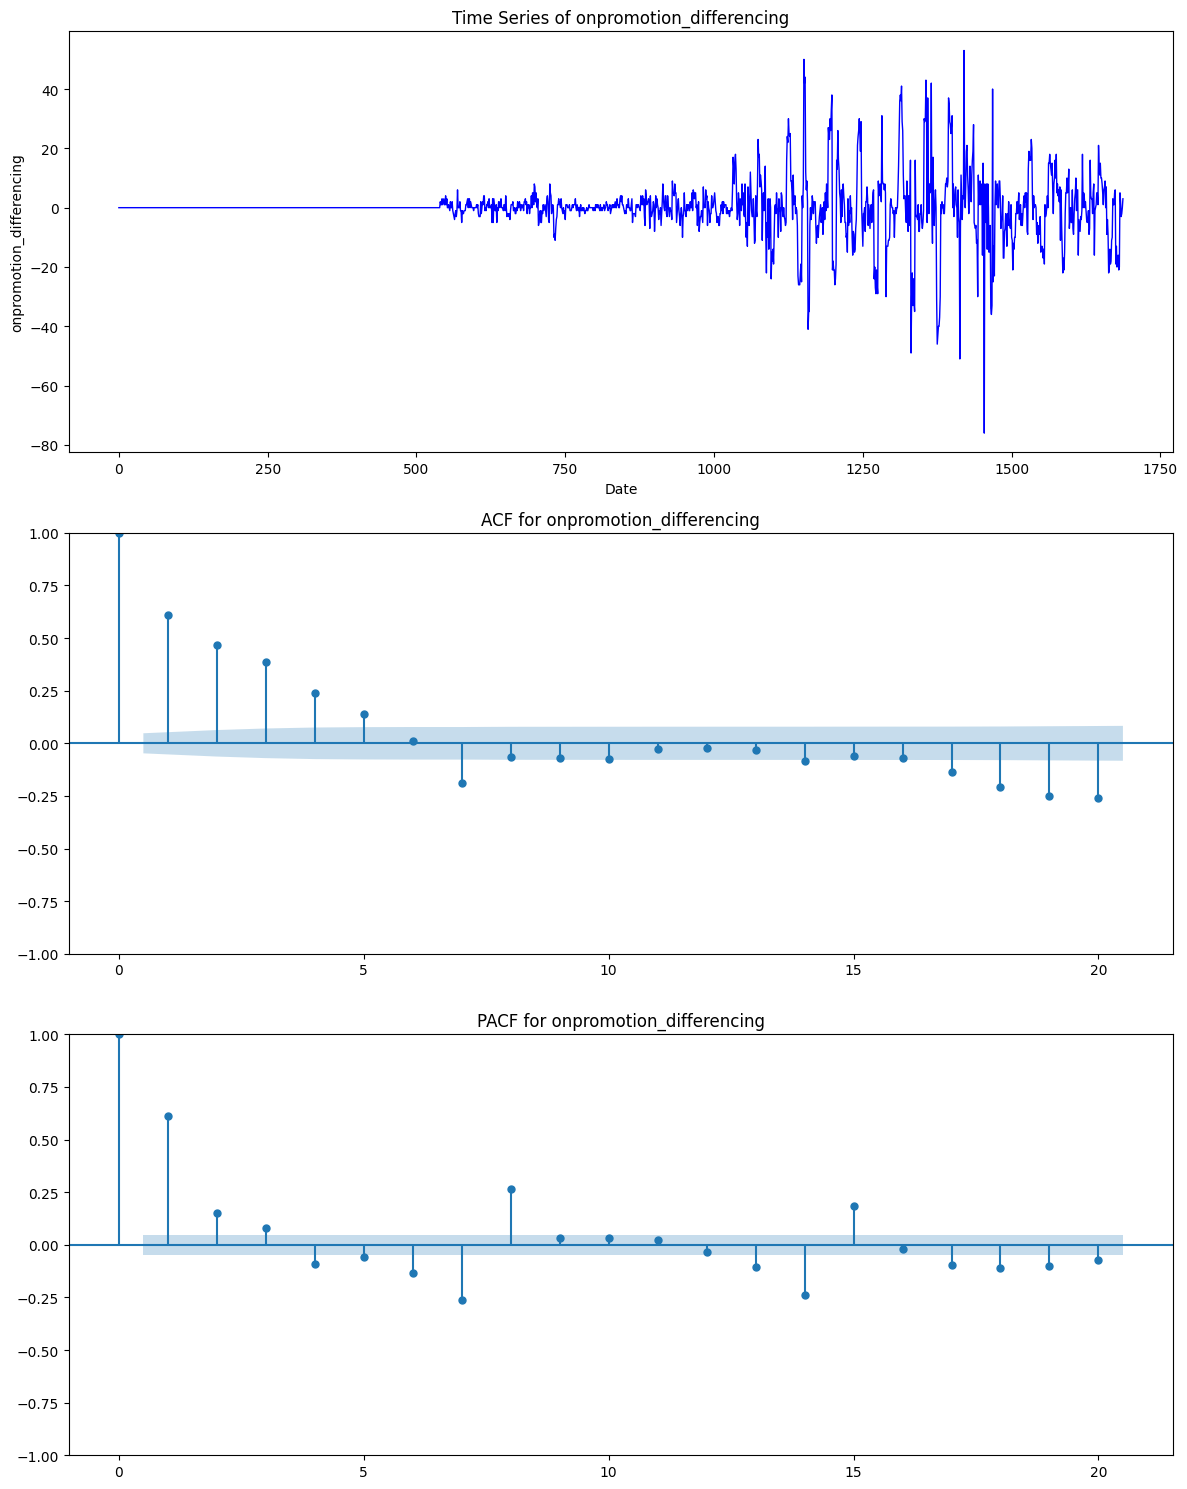

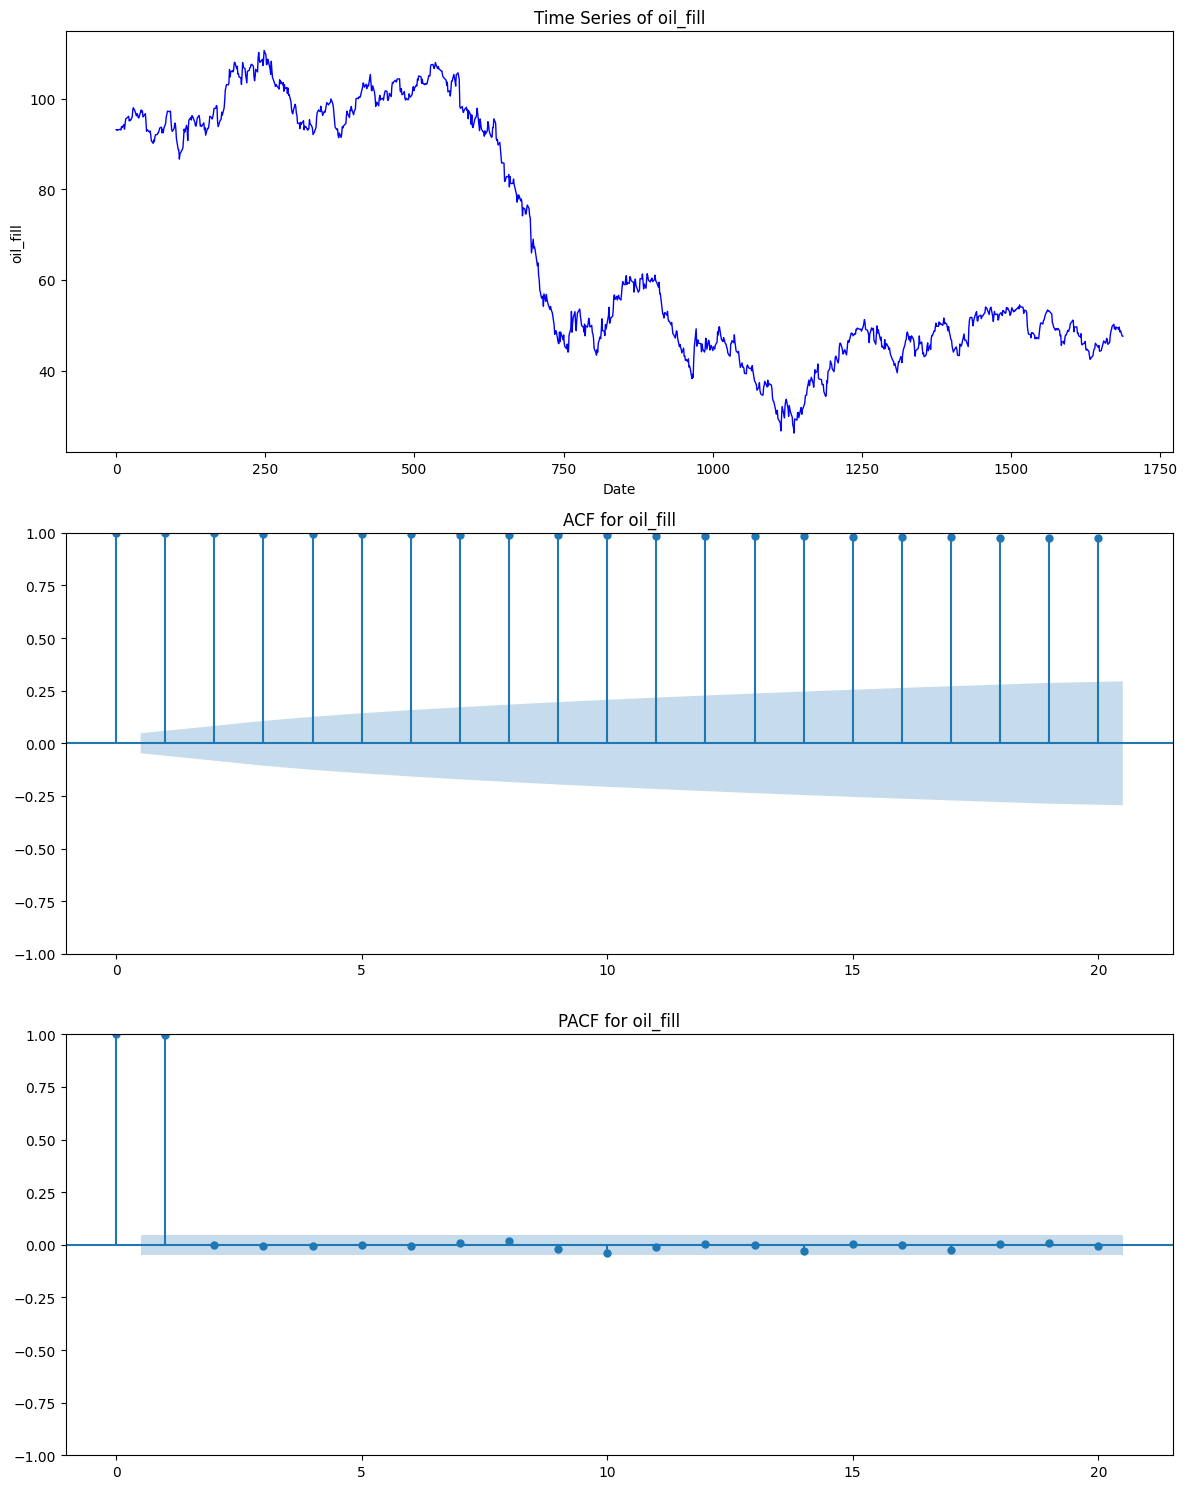

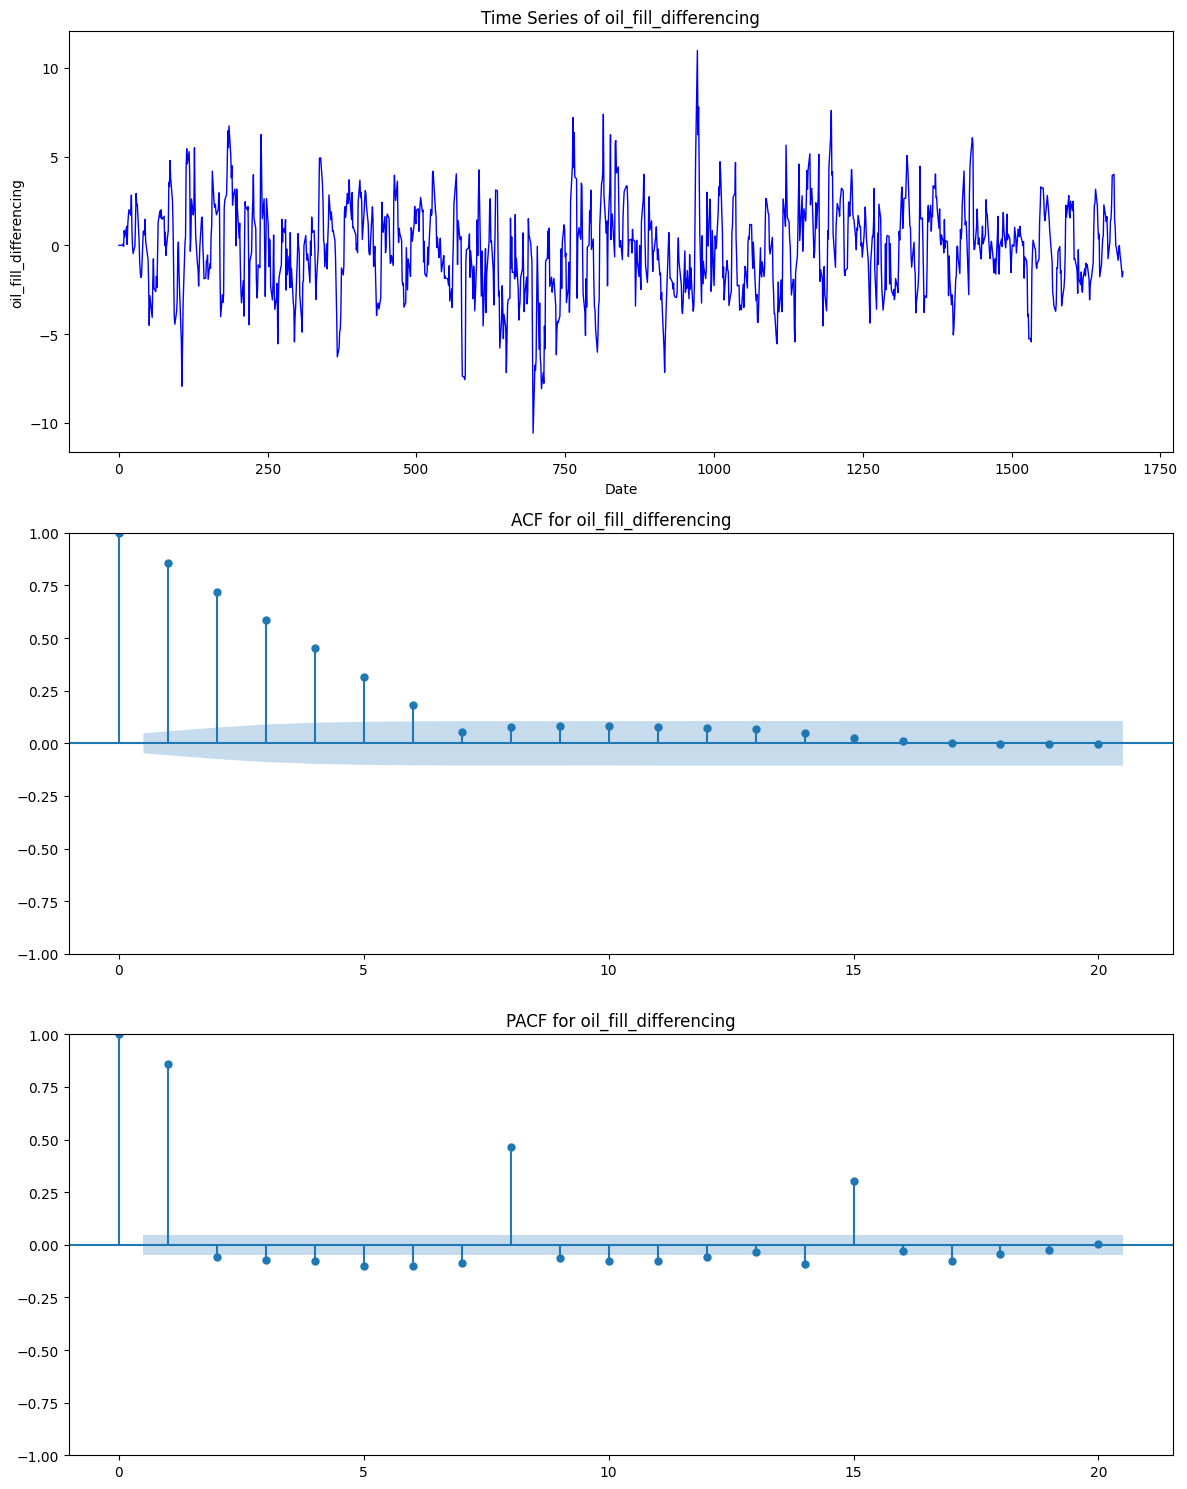

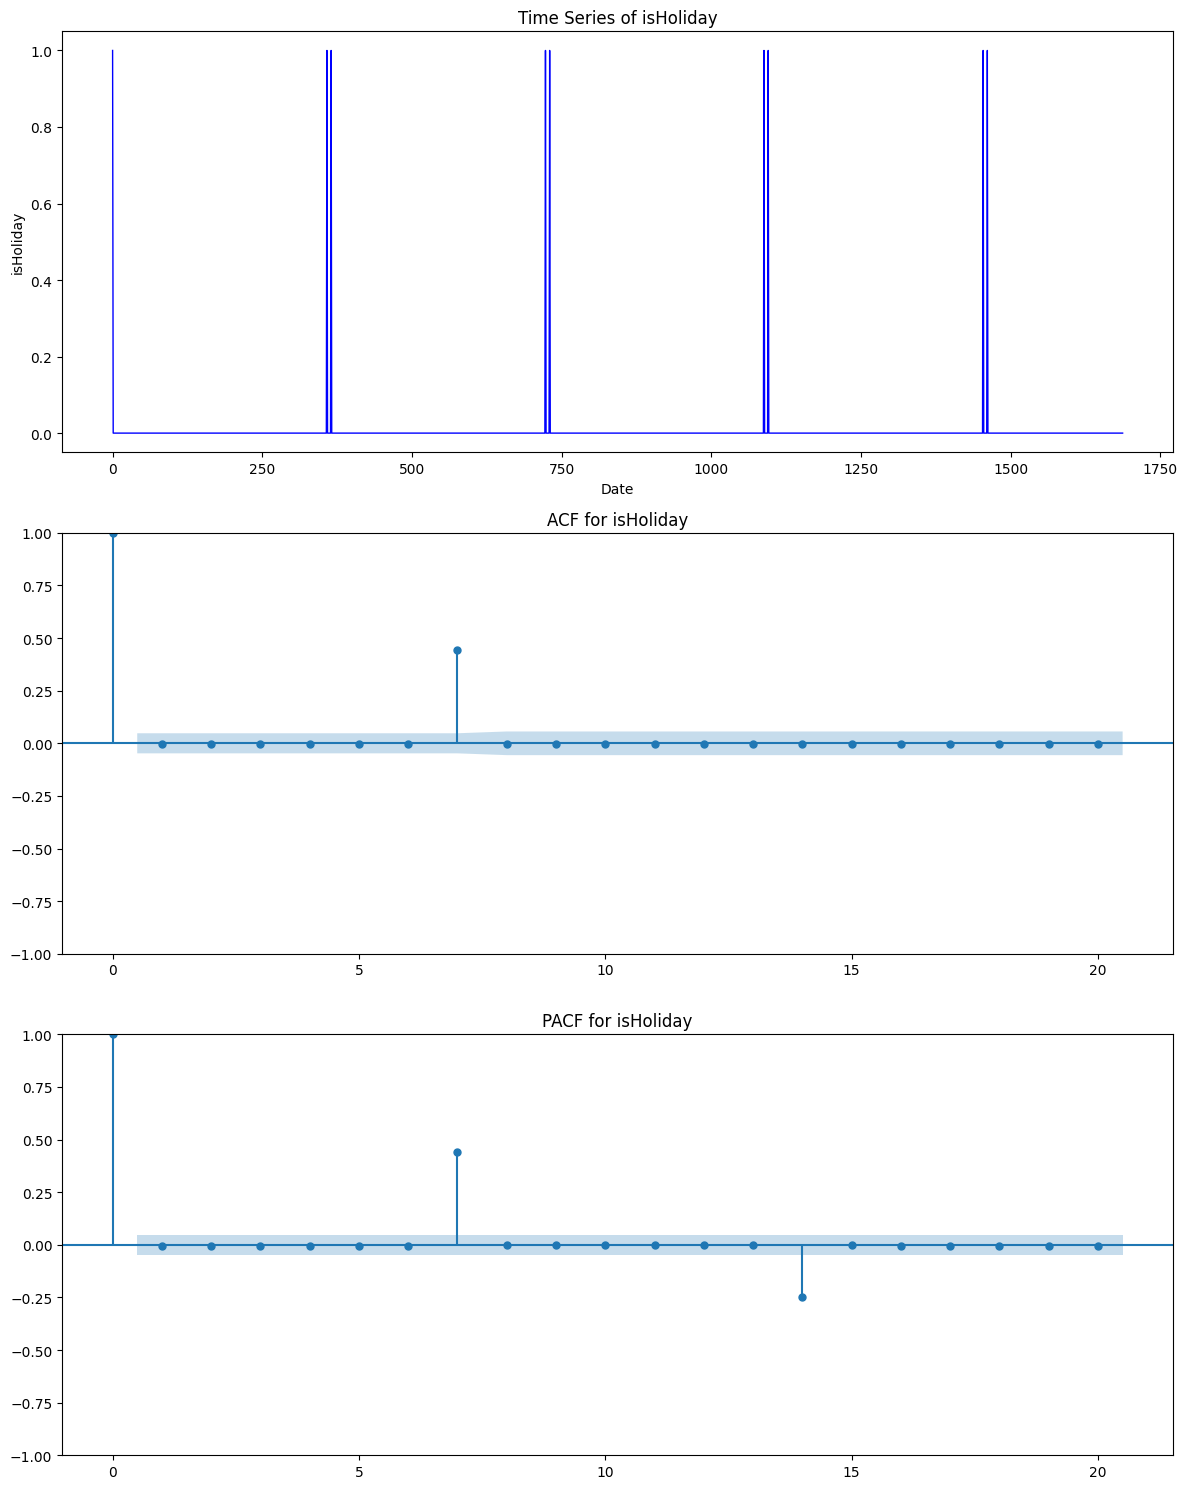

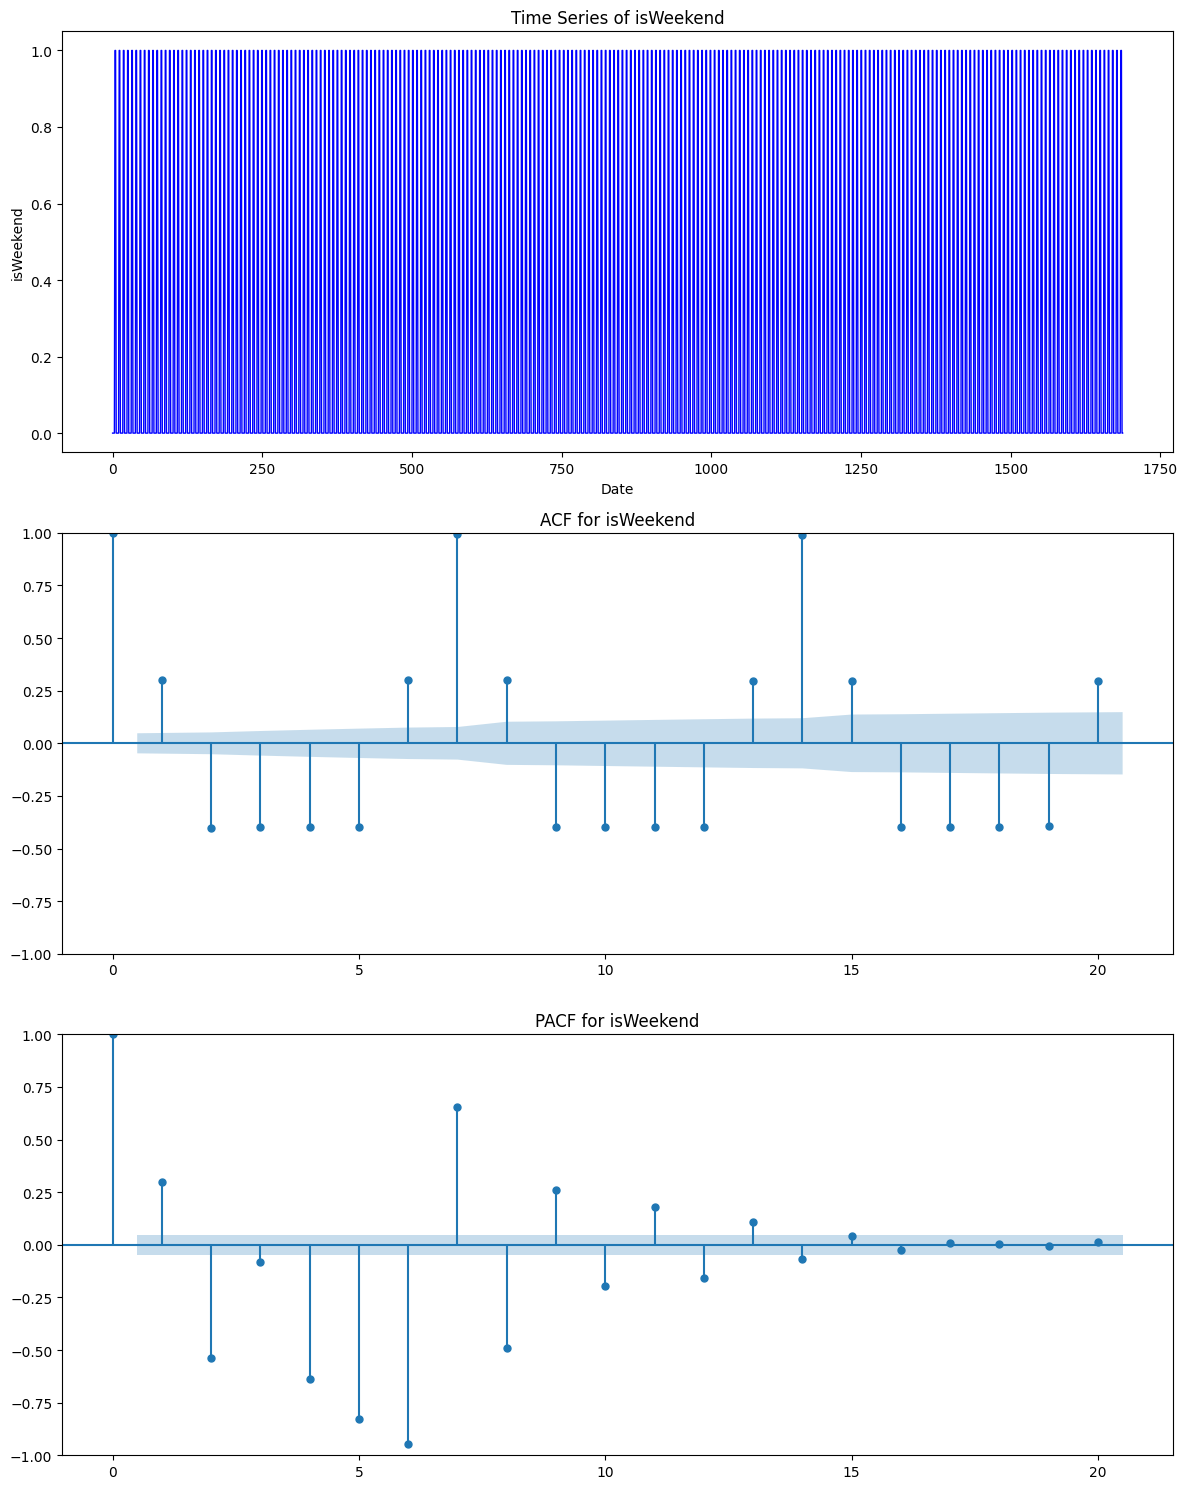

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']
df = sales_df
lagsnya = 20

# df=df[df['date']>=pd.to_datetime('2015-12-01')]
# df=df[df['date']<pd.to_datetime('2016-02-01')]


for feature in daftarFeature : 

    fig, axes = plt.subplots(3, 1, figsize=(12, 15))


    axes[0].plot(df.index, df[feature], color='blue', linewidth=1)
    axes[0].set_title(f'Time Series of {feature}')
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel(feature)

    plot_acf(df[feature], lags=lagsnya, ax=axes[1])
    axes[1].set_title(f'ACF for {feature}')


    plot_pacf(df[feature], lags=lagsnya, ax=axes[2])
    axes[2].set_title(f'PACF for {feature}')

    plt.tight_layout()  
    plt.show()


In [51]:
sales_df

id       date     family   sales  onpromotion  dcoilwtico  \
0        1455 2013-01-01  BEVERAGES     0.0            0         NaN   
1        3237 2013-01-02  BEVERAGES   947.0            0       93.14   
2        5019 2013-01-03  BEVERAGES   847.0            0       92.97   
3        6801 2013-01-04  BEVERAGES   859.0            0       93.12   
4        8583 2013-01-05  BEVERAGES   912.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1683  2993433 2017-08-11  BEVERAGES  1717.0           11       48.81   
1684  2995215 2017-08-12  BEVERAGES  1353.0            6         NaN   
1685  2996997 2017-08-13  BEVERAGES  1838.0            9         NaN   
1686  2998779 2017-08-14  BEVERAGES  1771.0           10       47.59   
1687  3000561 2017-08-15  BEVERAGES  1654.0           10       47.57   

       weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  \
0       Tuesday                 1  2013      1    1          0          1   
1     Wednesday                 1  2013      1    2          0          0   
2      Thursday                 1  2013      1    3          0          0   
3        Friday                 1  2013      1    4          0          0   
4      Saturday                 1  2013      1    5          1          0   
...         ...               ...   ...    ...  ...        ...        ...   
1683     Friday                32  2017      8   11          0          0   
1684   Saturday                32  2017      8   12          1          0   
1685     Sunday                32  2017      8   13          1          0   
1686     Monday                33  2017      8   14          0          0   
1687    Tuesday                33  2017      8   15          0          0   

       oil_fill  onpromotion_differencing  oil_fill_differencing  
0     93.140000                       0.0                   0.00  
1     93.140000                       0.0                   0.00  
2     92.970000                       0.0                   0.00  
3     93.120000                       0.0                   0.00  
4     93.146667                       0.0                   0.00  
...         ...                       ...                    ...  
1683  48.810000                       2.0                  -0.76  
1684  48.403333                      -3.0                  -1.10  
1685  47.996667                      -2.0                  -1.44  
1686  47.590000                       0.0                  -1.78  
1687  47.570000                       3.0                  -1.50  

[1688 rows x 16 columns]

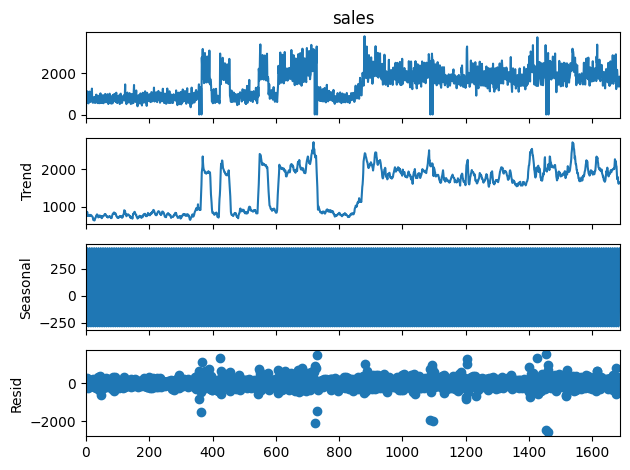

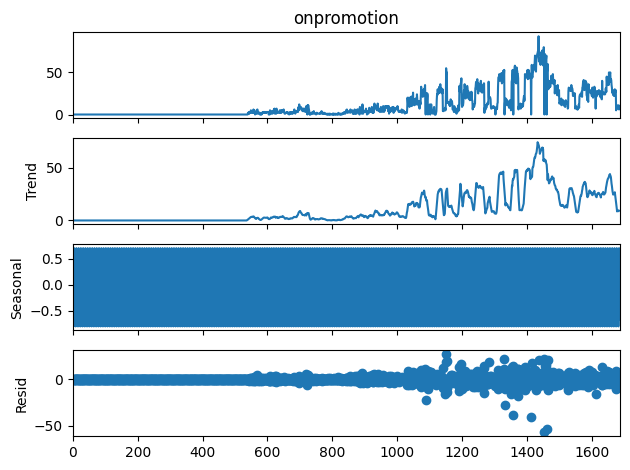

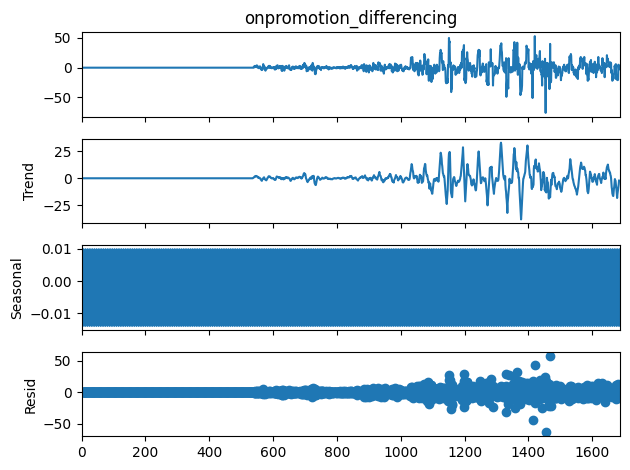

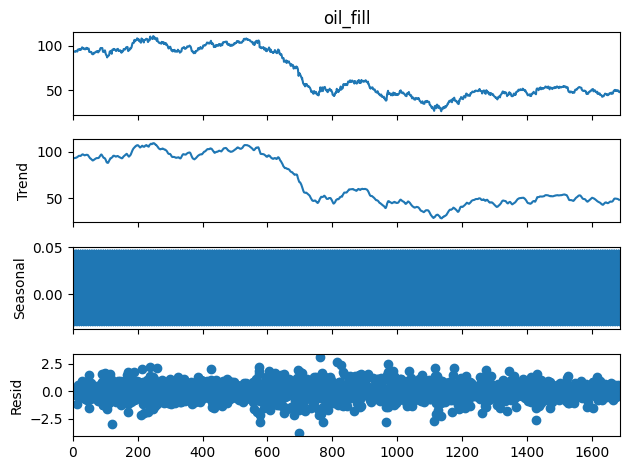

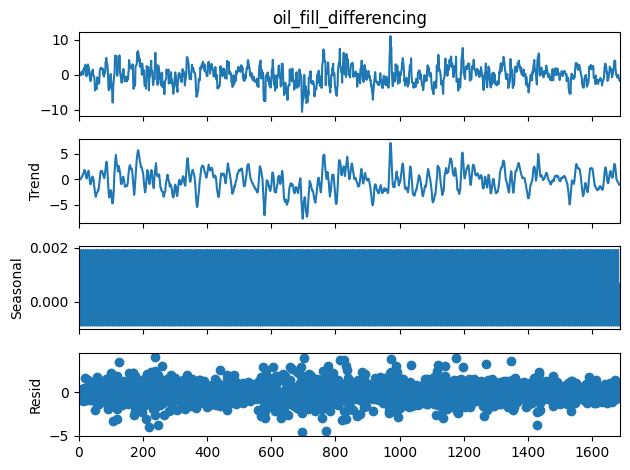

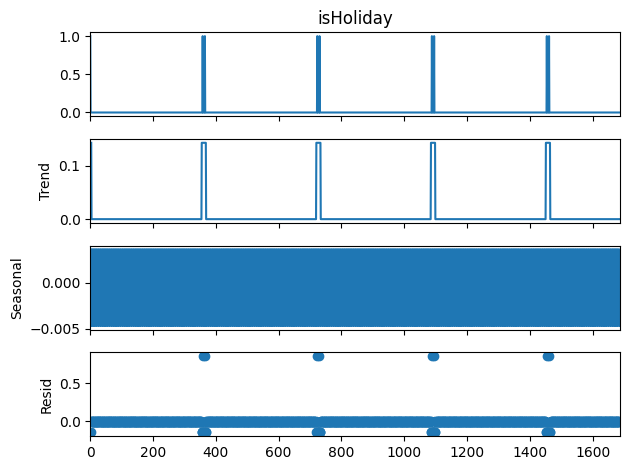

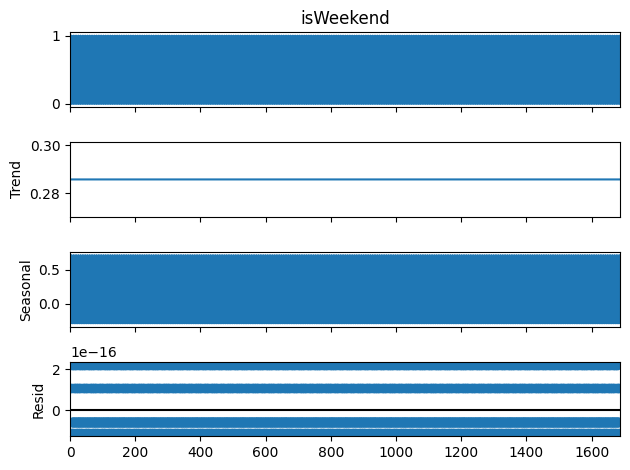

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = sales_df
# df=df[df['date']>=pd.to_datetime('2016-01-01')]
# df=df[df['date']<pd.to_datetime('2017-01-01')]

vPariodenya = 7

#karena seasonal_decompose tidak bisa handle missing value
#maka baris pertama untuk kolom on``
df['onpromotion_differencing'] = df['onpromotion_differencing'].fillna(method='bfill')
df['oil_fill_differencing'] = df['oil_fill_differencing'].fillna(method='bfill')

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']

for feature in daftarFeature:

    # Decompose sales data (Assuming daily data, adjust period if needed)
    result = seasonal_decompose(df[feature], model='additive', period=vPariodenya  )

    # Plot decomposition
    result.plot()
    plt.show()

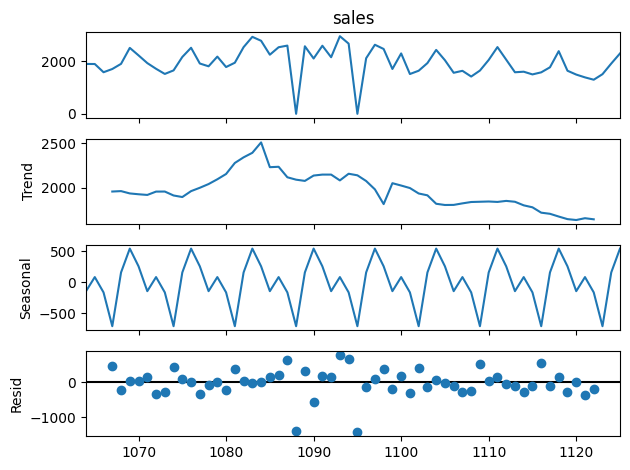

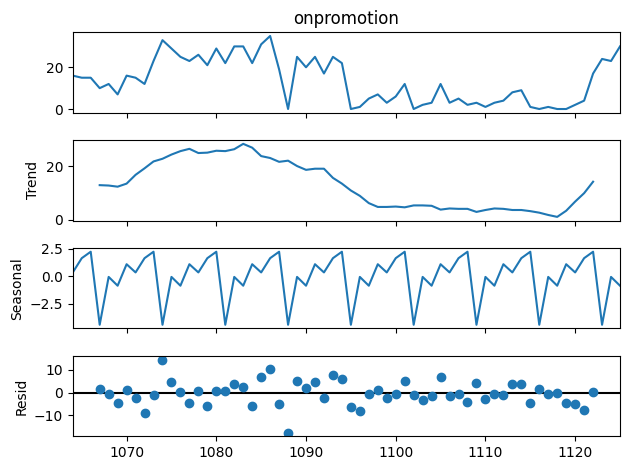

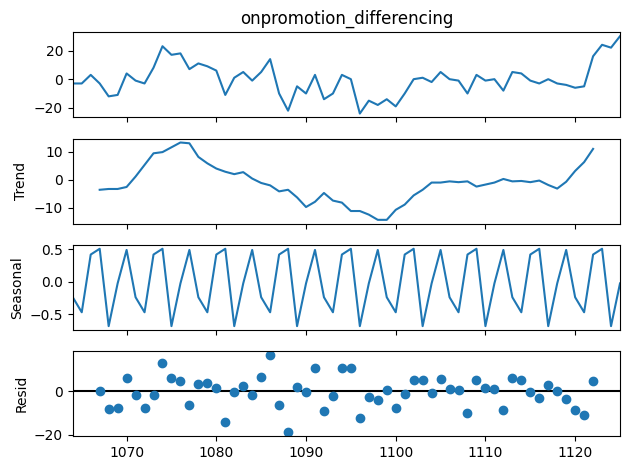

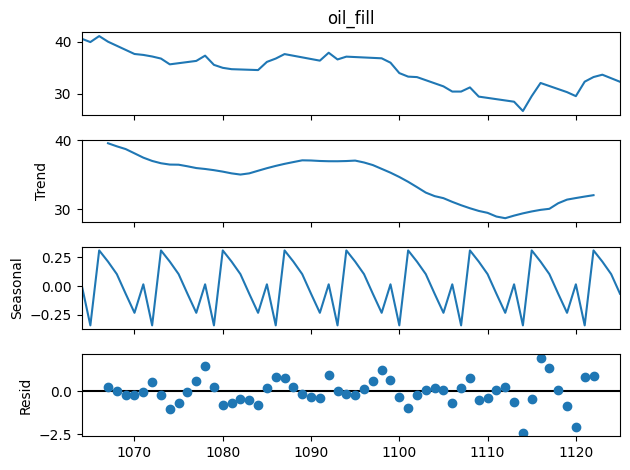

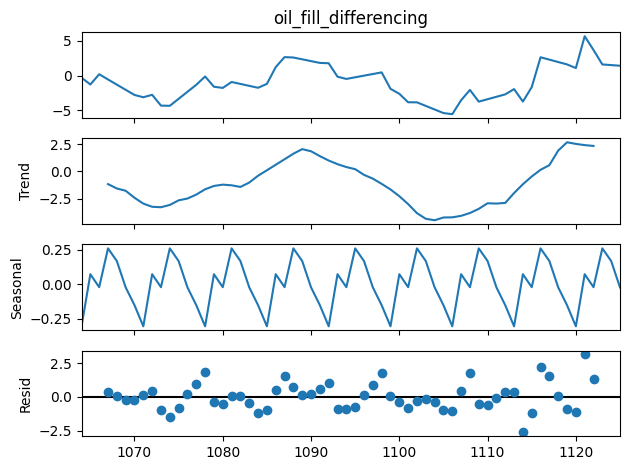

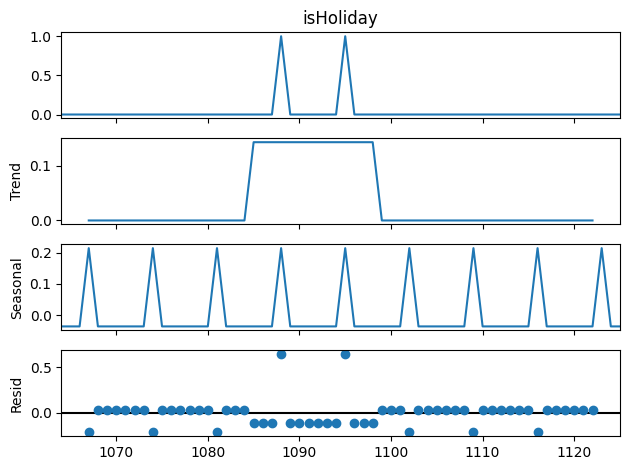

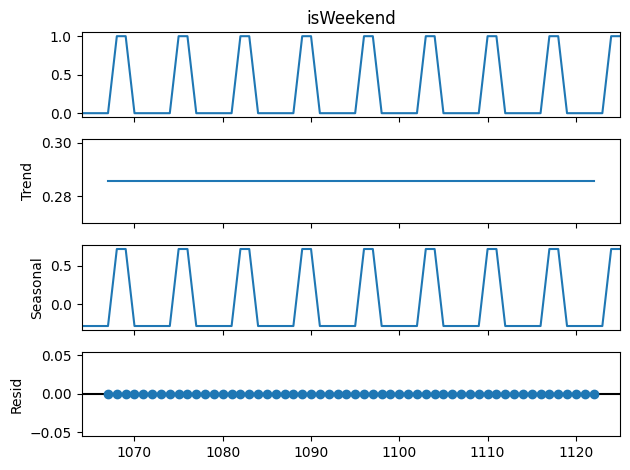

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = sales_df
df=df[df['date']>=pd.to_datetime('2015-12-01')]
df=df[df['date']<pd.to_datetime('2016-02-01')]

vPariodenya = 7

#karena seasonal_decompose tidak bisa handle missing value
#maka baris pertama untuk kolom on``
df['onpromotion_differencing'] = df['onpromotion_differencing'].fillna(method='bfill')
df['oil_fill_differencing'] = df['oil_fill_differencing'].fillna(method='bfill')

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']

for feature in daftarFeature:

    # Decompose sales data (Assuming daily data, adjust period if needed)
    result = seasonal_decompose(df[feature], model='additive', period=vPariodenya  )

    # Plot decomposition
    result.plot()
    plt.show()

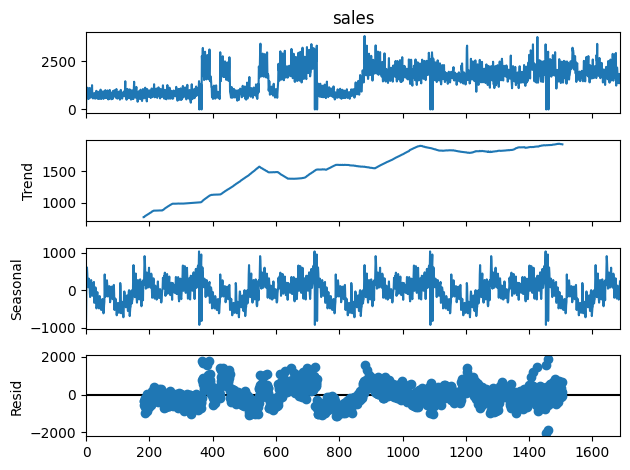

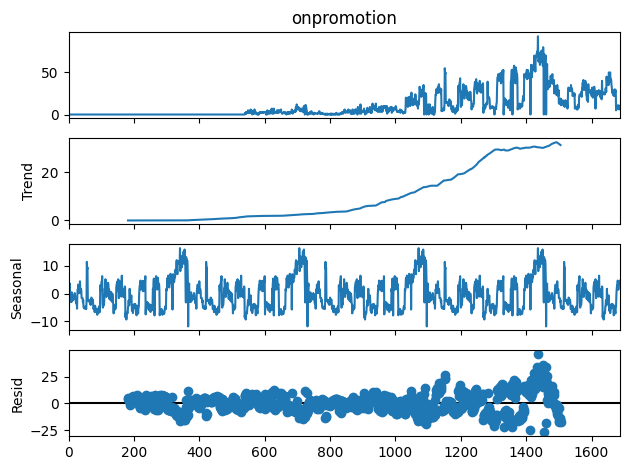

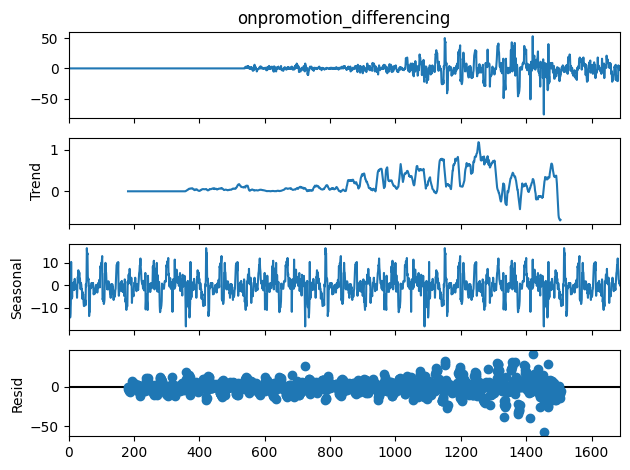

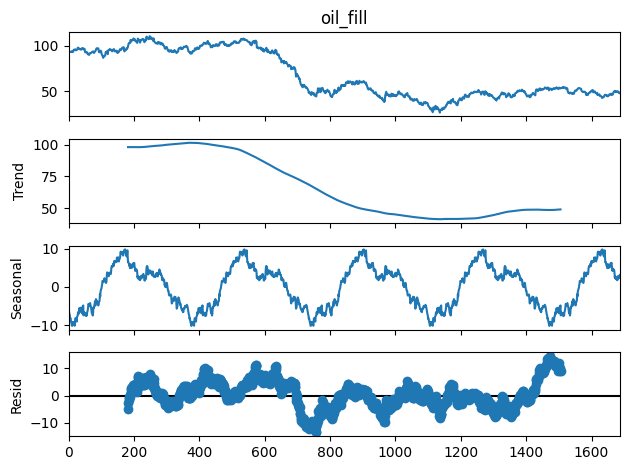

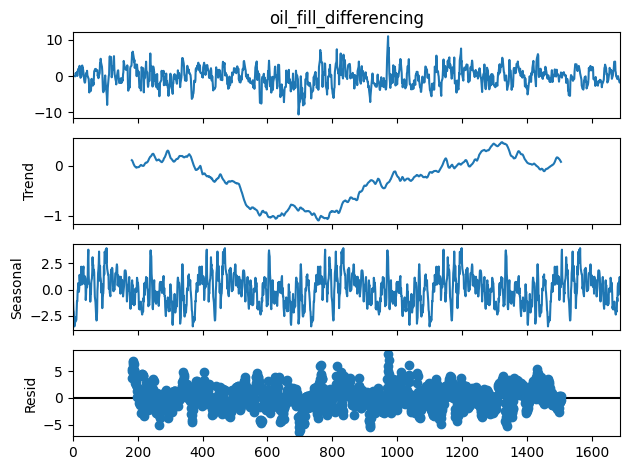

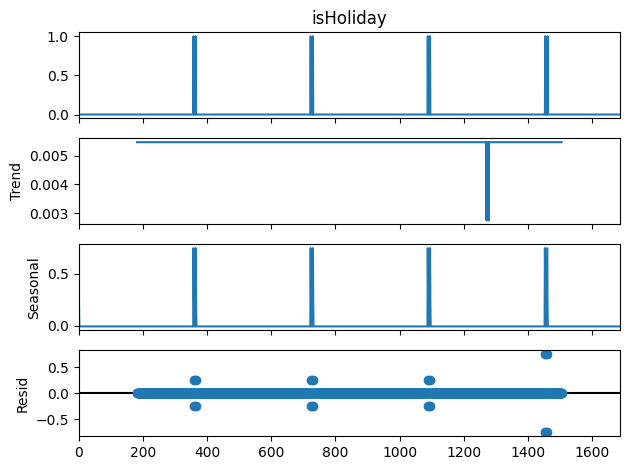

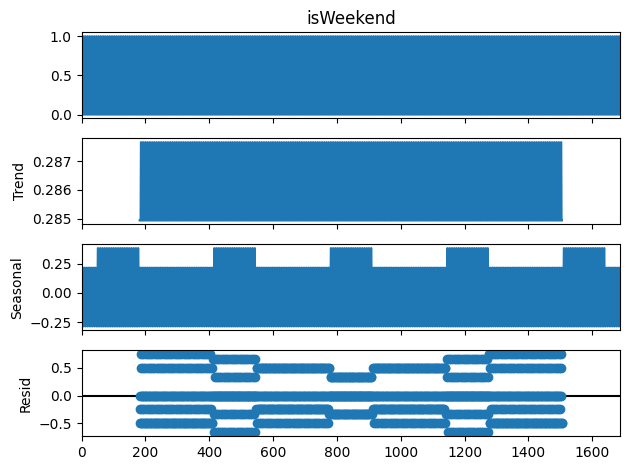

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df = sales_df
# df=df[df['date']>=pd.to_datetime('2016-01-01')]
# df=df[df['date']<pd.to_datetime('2017-01-01')]

vPariodenya = 365

#karena seasonal_decompose tidak bisa handle missing value
#maka baris pertama untuk kolom on``
df['onpromotion_differencing'] = df['onpromotion_differencing'].fillna(method='bfill')
df['oil_fill_differencing'] = df['oil_fill_differencing'].fillna(method='bfill')

daftarFeature=['sales','onpromotion','onpromotion_differencing','oil_fill','oil_fill_differencing','isHoliday','isWeekend']

for feature in daftarFeature:

    # Decompose sales data (Assuming daily data, adjust period if needed)
    result = seasonal_decompose(df[feature], model='additive', period=vPariodenya  )

    # Plot decomposition
    result.plot()
    plt.show()




# Preparation for Modelling


In [55]:
print(sales_df.columns)
print(sales_df.head())

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill', 'onpromotion_differencing',
       'oil_fill_differencing'],
      dtype='object')
     id       date     family  sales  onpromotion  dcoilwtico   weekdays  \
0  1455 2013-01-01  BEVERAGES    0.0            0         NaN    Tuesday   
1  3237 2013-01-02  BEVERAGES  947.0            0       93.14  Wednesday   
2  5019 2013-01-03  BEVERAGES  847.0            0       92.97   Thursday   
3  6801 2013-01-04  BEVERAGES  859.0            0       93.12     Friday   
4  8583 2013-01-05  BEVERAGES  912.0            0         NaN   Saturday   

   week_of_the_year  year  month  day  isWeekend  isHoliday   oil_fill  \
0                 1  2013      1    1          0          1  93.140000   
1                 1  2013      1    2          0          0  93.140000   
2                 1  2013      1    3          0          0  

## copy sales_df -> data_df

In [56]:
data_df = sales_df[['date','sales', 'onpromotion_differencing','oil_fill_differencing', 'isWeekend','isHoliday']]
data_df

date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0                   0.00   
1    2013-01-02   947.0                       0.0                   0.00   
2    2013-01-03   847.0                       0.0                   0.00   
3    2013-01-04   859.0                       0.0                   0.00   
4    2013-01-05   912.0                       0.0                   0.00   
...         ...     ...                       ...                    ...   
1683 2017-08-11  1717.0                       2.0                  -0.76   
1684 2017-08-12  1353.0                      -3.0                  -1.10   
1685 2017-08-13  1838.0                      -2.0                  -1.44   
1686 2017-08-14  1771.0                       0.0                  -1.78   
1687 2017-08-15  1654.0                       3.0                  -1.50   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1683          0          0  
1684          1          0  
1685          1          0  
1686          0          0  
1687          0          0  

[1688 rows x 6 columns]

In [57]:
duplicate_rows = data_df[data_df.duplicated()]
print(duplicate_rows)

data_df = data_df.drop_duplicates().reset_index(drop=True)
data_df


Empty DataFrame
Columns: [date, sales, onpromotion_differencing, oil_fill_differencing, isWeekend, isHoliday]
Index: []


date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0                   0.00   
1    2013-01-02   947.0                       0.0                   0.00   
2    2013-01-03   847.0                       0.0                   0.00   
3    2013-01-04   859.0                       0.0                   0.00   
4    2013-01-05   912.0                       0.0                   0.00   
...         ...     ...                       ...                    ...   
1683 2017-08-11  1717.0                       2.0                  -0.76   
1684 2017-08-12  1353.0                      -3.0                  -1.10   
1685 2017-08-13  1838.0                      -2.0                  -1.44   
1686 2017-08-14  1771.0                       0.0                  -1.78   
1687 2017-08-15  1654.0                       3.0                  -1.50   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1683          0          0  
1684          1          0  
1685          1          0  
1686          0          0  
1687          0          0  

[1688 rows x 6 columns]

## Splitting Data

In [58]:
# splitting the data
percentage = 80
x = round((len(data_df)-1)*percentage/100)
data_df.loc[1350]

date                        2016-09-12 00:00:00
sales                                    1635.0
onpromotion_differencing                   -7.0
oil_fill_differencing                     1.545
isWeekend                                     0
isHoliday                                     0
Name: 1350, dtype: object

In [59]:
original_train_data_df = sales_df[sales_df['date'] <= '2016-09-12']
original_val_data_df = sales_df[sales_df['date'] > '2016-09-12']

varmax_train_data_df = data_df[data_df['date'] <= '2016-09-12']
varmax_val_data_df = data_df[data_df['date'] > '2016-09-12']

print(f'tail varmax_train_data_df :\n {varmax_train_data_df.tail()}')
print(f'head varmax_val_data_df :\n {varmax_val_data_df.head()}')

tail varmax_train_data_df :
            date   sales  onpromotion_differencing  oil_fill_differencing  \
1346 2016-09-08  1096.0                      -2.0               4.460000   
1347 2016-09-09  1529.0                      -2.0               1.490000   
1348 2016-09-10  1932.0                       1.0               1.508333   
1349 2016-09-11  2241.0                      -5.0               1.526667   
1350 2016-09-12  1635.0                      -7.0               1.545000   

      isWeekend  isHoliday  
1346          0          0  
1347          0          0  
1348          1          0  
1349          1          0  
1350          0          0  
head varmax_val_data_df :
            date   sales  onpromotion_differencing  oil_fill_differencing  \
1351 2016-09-13  1589.0                      -5.0               0.060000   
1352 2016-09-14  1513.0                      -1.0              -1.850000   
1353 2016-09-15  1504.0                      30.0              -3.780000   
1354 2016

In [60]:
print(varmax_train_data_df.dtypes)

date                        datetime64[ns]
sales                              float64
onpromotion_differencing           float64
oil_fill_differencing              float64
isWeekend                            int32
isHoliday                            int32
dtype: object


In [61]:
print(varmax_train_data_df.isna().sum())

date                        0
sales                       0
onpromotion_differencing    0
oil_fill_differencing       0
isWeekend                   0
isHoliday                   0
dtype: int64


### 2 cell dibawah ini saya jadikan COMMENT 

agar tidak makan waktu banyak, hasil **model.fit()** sudah saya jadikan pickle file ; jadi tinggal di load di cell berikutnya

In [64]:
import pickle

In [65]:


from statsmodels.tsa.statespace.varmax import VARMAX


# Define Endogenous (Variables to Predict)
endog_vars = ['sales', 'onpromotion_differencing']  # Targets
endog = varmax_train_data_df[endog_vars]

# Define Exogenous (Other Features)
exog_vars = ['oil_fill_differencing', 'isWeekend', 'isHoliday']  # Predictors
exog = varmax_train_data_df[exog_vars]

# Fit VARMAX Model
model = VARMAX(endog=endog, exog=exog, order=(7, 2))  
model_fit = model.fit()


# Print summary
print(model_fit.summary())


# Save the trained model
with open('varmax_BEVERAGES_model_awal_sebelum_tuning.pkl', 'wb') as f:
    pickle.dump(model_fit, f)



c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     Statespace Model Results                                    
Dep. Variable:     ['sales', 'onpromotion_differencing']   No. Observations:                 1351
Model:                                       VARMAX(7,2)   Log Likelihood              -13747.842
                                             + intercept   AIC                          27589.685
Date:                                   Wed, 12 Feb 2025   BIC                          27834.489
Time:                                           18:13:09   HQIC                         27681.360
Sample:                                                0                                         
                                                  - 1351                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):             0.04, 2.84   Jarque-Bera (JB):    6169.47, 33670.89
Prob(Q):                        0.

## Iterasi hyper parameter

In [66]:



import itertools
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error


p_values = [1,2,5,7]  # Endogenous lags
q_values = [1,2,5,7]  # Exogenous lags


endog_vars = ['sales', 'onpromotion_differencing']  # Targets
endog = varmax_train_data_df[endog_vars]


exog_vars = ['oil_fill_differencing', 'isWeekend', 'isHoliday']  
exog = varmax_train_data_df[exog_vars]

# Loop through all combinations of p and q
for p, q in itertools.product(p_values, q_values):
    print(f"Trying VARMAX({p}, {q})")
    
    # Create and fit the VARMAX model
    model = VARMAX(endog=endog, exog=exog, order=(p, q))
    model_fit = model.fit(disp=False)
    
    # Forecast for validation data
    forecast_steps = len(varmax_val_data_df)
    forecast = model_fit.forecast(steps=forecast_steps, exog=varmax_val_data_df[exog_vars])
    
    # Save the trained model
    filename = (f'varmax_BEVERAGES_model_p{p}_q{q}_.pkl')
    with open(filename, 'wb') as f:
        pickle.dump(model_fit, f)




Trying VARMAX(1, 1)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generical

Trying VARMAX(1, 2)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(1, 5)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(1, 7)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(2, 1)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(2, 2)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(2, 5)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(2, 7)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(5, 1)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(5, 2)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(5, 5)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Trying VARMAX(5, 7)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(7, 1)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(7, 2)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

Trying VARMAX(7, 5)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Trying VARMAX(7, 7)


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification iss

## trying All created models to find best model


In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np
import os
import glob

# daftarModel = ['varmax_BEVERAGES_model_awal_sebelum_tuning.pkl','varmax_BEVERAGES_model_p1_q1_.pkl',
#                'varmax_BEVERAGES_model_p1_q2_.pkl','varmax_BEVERAGES_model_p1_q5_.pkl','varmax_BEVERAGES_model_p1_q7_.pkl','varmax_BEVERAGES_model_p1_q30_.pkl',
#                'varmax_BEVERAGES_model_p2_q2_.pkl','varmax_BEVERAGES_model_p2_q5_.pkl','varmax_BEVERAGES_model_p2_q7_.pkl','varmax_BEVERAGES_model_p2_q30_.pkl',
#                'varmax_BEVERAGES_model_p5_q2_.pkl','varmax_BEVERAGES_model_p5_q5_.pkl','varmax_BEVERAGES_model_p5_q7_.pkl','varmax_BEVERAGES_model_p5_q30_.pkl',
#                'varmax_BEVERAGES_model_p7_q2_.pkl','varmax_BEVERAGES_model_p7_q5_.pkl','varmax_BEVERAGES_model_p7_q7_.pkl','varmax_BEVERAGES_model_p7_q30_.pkl',
#                'varmax_BEVERAGES_model_p30_q2_.pkl','varmax_BEVERAGES_model_p30_q5_.pkl','varmax_BEVERAGES_model_p30_q7_.pkl','varmax_BEVERAGES_model_p30_q30_.pkl'
#                ]

directory = r'D:\__DOWNLOADS\_AIForINDONESIA\Codes\git\learnWithAIforIndonesia\Sesi15_Project01'
pattern = os.path.join(directory, 'varmax_BEVERAGES_model*.pkl')
full_file_list = glob.glob(pattern)
daftarModel = [os.path.basename(file) for file in full_file_list]

print(f'daftarModel : \n {daftarModel}')


daftarModel : 
 ['varmax_BEVERAGES_model_awal_sebelum_tuning.pkl', 'varmax_BEVERAGES_model_p1_q1_.pkl', 'varmax_BEVERAGES_model_p1_q2_.pkl', 'varmax_BEVERAGES_model_p1_q5_.pkl', 'varmax_BEVERAGES_model_p1_q7_.pkl', 'varmax_BEVERAGES_model_p2_q1_.pkl', 'varmax_BEVERAGES_model_p2_q2_.pkl', 'varmax_BEVERAGES_model_p2_q5_.pkl', 'varmax_BEVERAGES_model_p2_q7_.pkl', 'varmax_BEVERAGES_model_p5_q1_.pkl', 'varmax_BEVERAGES_model_p5_q2_.pkl', 'varmax_BEVERAGES_model_p5_q5_.pkl', 'varmax_BEVERAGES_model_p5_q7_.pkl', 'varmax_BEVERAGES_model_p7_q1_.pkl', 'varmax_BEVERAGES_model_p7_q2_.pkl', 'varmax_BEVERAGES_model_p7_q5_.pkl', 'varmax_BEVERAGES_model_p7_q7_.pkl']


In [75]:




endog_vars = ['sales', 'onpromotion_differencing']  
endog = varmax_train_data_df[endog_vars]


exog_vars = ['oil_fill_differencing', 'isWeekend', 'isHoliday']  
exog = varmax_train_data_df[exog_vars]

lastValueOf_originalOnPromotion = original_train_data_df['onpromotion'].tail(1).values[0]


results_coba_model = []


for namaFile in daftarModel :
    print(f"Loading Model {namaFile}")
    try:
        with open(namaFile, 'rb') as f:
            loaded_model = pickle.load(f)

        # lakukan forcasting
        forecast_steps = len(varmax_val_data_df)
        forecast = loaded_model.forecast(steps=forecast_steps, exog=varmax_val_data_df[exog_vars])
        
        # membalikkan nilai differncing ke nilai semul
        forecast['onpromotion'] = lastValueOf_originalOnPromotion + forecast['onpromotion_differencing'].cumsum()

        # ambil nilai actual dan rata2 actual untuk nanti menghitung RMSE
        actual_sales = varmax_val_data_df['sales']
        actual_onpromotion_differencing = varmax_val_data_df['onpromotion_differencing']
        actual_onpromotion = original_val_data_df['onpromotion']

        mean_actual_sales = varmax_val_data_df['sales'].mean()
        mean_actual_onpromotion_differencing = varmax_val_data_df['onpromotion_differencing'].mean()
        mean_actual_onpromotion = original_val_data_df['onpromotion'].mean()


        # ambil nilai hasil forcast
        forecast_sales = forecast['sales']
        forecast_onpromotion_differencing = forecast['onpromotion_differencing']
        forecast_onpromotion = forecast['onpromotion'] 

        # Hitung RMSE
        rmse_sales = np.sqrt(mean_squared_error(actual_sales, forecast_sales))
        rmse_onpromotion_differencing = np.sqrt(mean_squared_error(actual_onpromotion_differencing, forecast_onpromotion_differencing))
        rmse_onpromotion = np.sqrt(mean_squared_error(actual_onpromotion, forecast_onpromotion))

        # nilai rata2 dan pembobotan untuk RMSE 
        avg_rmse = (rmse_sales + rmse_onpromotion) / 2
        weighted_rmse = (rmse_sales/mean_actual_sales) + (rmse_onpromotion/mean_actual_onpromotion)

        # simpan hasilnya di variable results_coba_model
        results_coba_model.append((namaFile,weighted_rmse, avg_rmse, rmse_sales, rmse_onpromotion_differencing,rmse_onpromotion))

    except FileNotFoundError:
        print(f"Error: {namaFile} not found. Skipping this file.")
    except Exception as e:
        print(f"An unexpected error occurred while loading {namaFile}: {e}")


       

Loading Model varmax_BEVERAGES_model_awal_sebelum_tuning.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generical

Loading Model varmax_BEVERAGES_model_p1_q1_.pkl
Loading Model varmax_BEVERAGES_model_p1_q2_.pkl
Loading Model varmax_BEVERAGES_model_p1_q5_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_BEVERAGES_model_p1_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_BEVERAGES_model_p2_q1_.pkl
Loading Model varmax_BEVERAGES_model_p2_q2_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generical

Loading Model varmax_BEVERAGES_model_p2_q5_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_BEVERAGES_model_p2_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generical

Loading Model varmax_BEVERAGES_model_p5_q1_.pkl
Loading Model varmax_BEVERAGES_model_p5_q2_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generical

Loading Model varmax_BEVERAGES_model_p5_q5_.pkl
Loading Model varmax_BEVERAGES_model_p5_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_BEVERAGES_model_p7_q1_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


Loading Model varmax_BEVERAGES_model_p7_q2_.pkl
Loading Model varmax_BEVERAGES_model_p7_q5_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generical

Loading Model varmax_BEVERAGES_model_p7_q7_.pkl


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [76]:
# print(type(results_coba_model))

print('Nama model ,RMSE weighted,  RMSE rata-rata , RMSE Sales , RMSE onpromotion_differencing, RMSE onpromotion')
for baris in results_coba_model:
    print(baris)

Nama model ,RMSE weighted,  RMSE rata-rata , RMSE Sales , RMSE onpromotion_differencing, RMSE onpromotion
('varmax_BEVERAGES_model_awal_sebelum_tuning.pkl', 1.3454742712441428, 373.6774729150609, 716.050726081988, 14.559098906143214, 31.30421974813377)
('varmax_BEVERAGES_model_p1_q1_.pkl', 2.3500297288985625, 376.2846874409412, 688.6063181312888, 14.584250553190982, 63.96305675059349)
('varmax_BEVERAGES_model_p1_q2_.pkl', 1.31049707858414, 336.54243363253954, 641.6731038716492, 14.604635307877402, 31.411763393429844)
('varmax_BEVERAGES_model_p1_q5_.pkl', 2.16594093819994, 297.71264701204194, 534.8231516587896, 14.739219684859789, 60.602142365294306)
('varmax_BEVERAGES_model_p1_q7_.pkl', 51.91977829014451, 1455.6416798945327, 1267.714728851418, 29.723258501796057, 1643.5686309376474)
('varmax_BEVERAGES_model_p2_q1_.pkl', 2.744148543077205, 370.02606625573185, 663.0313260998006, 14.591232795744688, 77.02080641166306)
('varmax_BEVERAGES_model_p2_q2_.pkl', 1.5584890201425199, 336.543755382

In [77]:
# best model yg nilainya terendah
fileName, best_weighted_rmse, best_avg_rmse, best_rmse_sales, best_rmse_onpromotion_differencing, best_rmse_onpromotion = min(results_coba_model, key=lambda x: x[1])

print(f"Best Model: {fileName} with Weighted RMSE: {best_weighted_rmse}")
print(f"  RMSE for Sales: {best_rmse_sales}")
print(f"  RMSE for onpromotion: {best_rmse_sales}")
print(f"  RMSE for onpromotion_differencing: {best_rmse_onpromotion_differencing}")


Best Model: varmax_BEVERAGES_model_p1_q2_.pkl with Weighted RMSE: 1.31049707858414
  RMSE for Sales: 641.6731038716492
  RMSE for onpromotion: 641.6731038716492
  RMSE for onpromotion_differencing: 14.604635307877402


dari Grid Search , ternyata yg terbaik adalah model yang pertama (varmax_model_awal_sebelum_tuning.pkl)

In [118]:

with open('varmax_BEVERAGES_model_p1_q2_.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [119]:
forecast_steps = len(varmax_val_data_df)  # Example: Forecasting 7 steps ahead
forecast = loaded_model.forecast(steps=forecast_steps, exog=varmax_val_data_df[exog_vars])
print(forecast)

            sales  onpromotion_differencing
1351  1599.402124                 -4.929116
1352  1626.334976                 -3.688361
1353  1614.044009                 -2.581142
1354  1597.486258                 -1.786012
1355  1644.254227                 -1.259982
...           ...                       ...
1683  1430.614210                  0.185275
1684  1488.508772                  0.143411
1685  1540.898381                  0.116110
1686  1527.845261                  0.137386
1687  1514.693455                  0.153578

[337 rows x 2 columns]


c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\andyp\.conda\envs\datly\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [120]:
varmax_train_data_df

date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0               0.000000   
1    2013-01-02   947.0                       0.0               0.000000   
2    2013-01-03   847.0                       0.0               0.000000   
3    2013-01-04   859.0                       0.0               0.000000   
4    2013-01-05   912.0                       0.0               0.000000   
...         ...     ...                       ...                    ...   
1346 2016-09-08  1096.0                      -2.0               4.460000   
1347 2016-09-09  1529.0                      -2.0               1.490000   
1348 2016-09-10  1932.0                       1.0               1.508333   
1349 2016-09-11  2241.0                      -5.0               1.526667   
1350 2016-09-12  1635.0                      -7.0               1.545000   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1346          0          0  
1347          0          0  
1348          1          0  
1349          1          0  
1350          0          0  

[1351 rows x 6 columns]

In [121]:
varmax_train_data_df

date   sales  onpromotion_differencing  oil_fill_differencing  \
0    2013-01-01     0.0                       0.0               0.000000   
1    2013-01-02   947.0                       0.0               0.000000   
2    2013-01-03   847.0                       0.0               0.000000   
3    2013-01-04   859.0                       0.0               0.000000   
4    2013-01-05   912.0                       0.0               0.000000   
...         ...     ...                       ...                    ...   
1346 2016-09-08  1096.0                      -2.0               4.460000   
1347 2016-09-09  1529.0                      -2.0               1.490000   
1348 2016-09-10  1932.0                       1.0               1.508333   
1349 2016-09-11  2241.0                      -5.0               1.526667   
1350 2016-09-12  1635.0                      -7.0               1.545000   

      isWeekend  isHoliday  
0             0          1  
1             0          0  
2             0          0  
3             0          0  
4             1          0  
...         ...        ...  
1346          0          0  
1347          0          0  
1348          1          0  
1349          1          0  
1350          0          0  

[1351 rows x 6 columns]

In [122]:
original_train_data_df = sales_df[sales_df['date'] <= '2016-09-12']
original_val_data_df = sales_df[sales_df['date'] > '2016-09-12']

lastValueOf_originalOnPromotion = original_train_data_df['onpromotion'].tail(1).values[0]
forecast['onpromotion'] = lastValueOf_originalOnPromotion + forecast['onpromotion_differencing'].cumsum()
forecast

sales  onpromotion_differencing  onpromotion
1351  1599.402124                 -4.929116     3.070884
1352  1626.334976                 -3.688361    -0.617477
1353  1614.044009                 -2.581142    -3.198619
1354  1597.486258                 -1.786012    -4.984631
1355  1644.254227                 -1.259982    -6.244613
...           ...                       ...          ...
1683  1430.614210                  0.185275    42.360252
1684  1488.508772                  0.143411    42.503663
1685  1540.898381                  0.116110    42.619774
1686  1527.845261                  0.137386    42.757159
1687  1514.693455                  0.153578    42.910737

[337 rows x 3 columns]

RMSE: 14.604635307877402


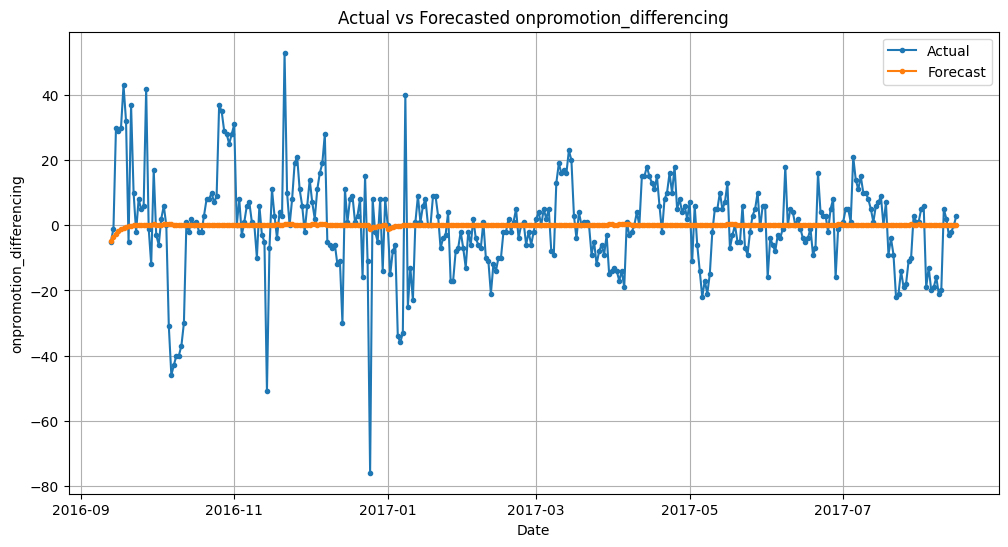

In [123]:
from sklearn.metrics import mean_squared_error


#actual value
actual_values = varmax_val_data_df['onpromotion_differencing']  

#forecast value
forecast_values = forecast['onpromotion_differencing']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {rmse}")


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(varmax_val_data_df['date'], actual_values, label='Actual', marker='.')
plt.plot(varmax_val_data_df['date'], forecast_values, label='Forecast', marker='.')
plt.xlabel('Date')
plt.ylabel('onpromotion_differencing')
plt.title('Actual vs Forecasted onpromotion_differencing')
plt.legend()
plt.grid(True)
plt.show()

RMSE: 31.411763393429844


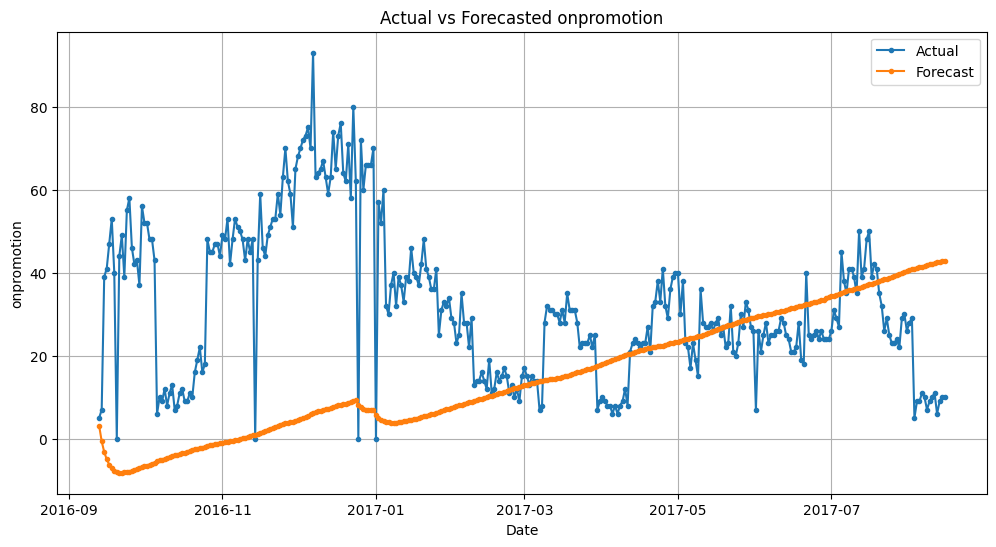

In [124]:
from sklearn.metrics import mean_squared_error


#Actual Value
actual_values = original_val_data_df['onpromotion']  # Adjust as per your data

#Forecast Value
forecast_values = forecast['onpromotion']

# Calculate RMSE
varmax_rmse_onpromotion = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {varmax_rmse_onpromotion}")


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(original_val_data_df['date'], actual_values, label='Actual', marker='.')
plt.plot(varmax_val_data_df['date'], forecast_values, label='Forecast', marker='.')
plt.xlabel('Date')
plt.ylabel('onpromotion')
plt.title('Actual vs Forecasted onpromotion')
plt.legend()
plt.grid(True)
plt.show()

RMSE: 641.6731038716492


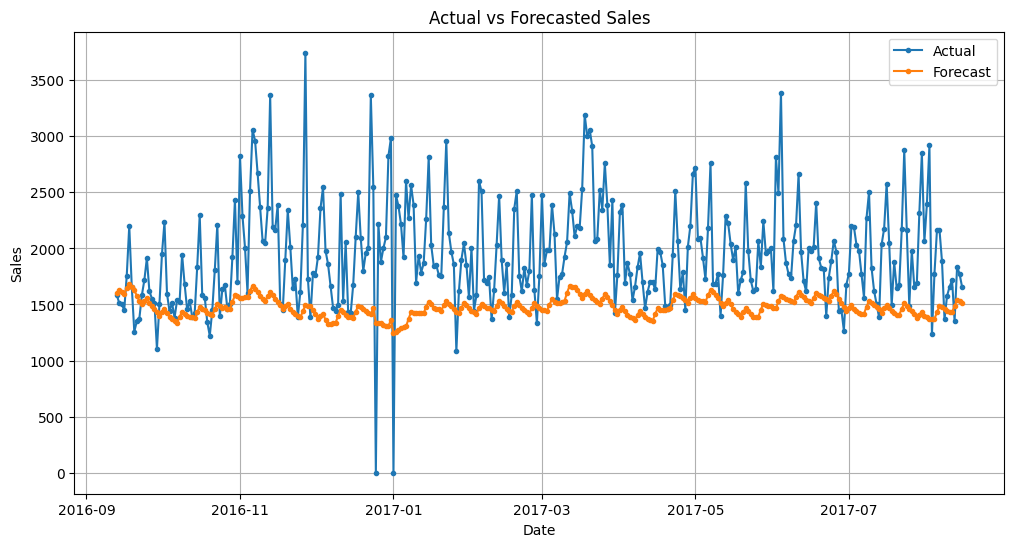

In [125]:
from sklearn.metrics import mean_squared_error


#Actual Value
actual_values = varmax_val_data_df['sales']  # Adjust as per your data

#Forecast Value
forecast_values = forecast['sales']

# Calculate RMSE
varmax_rmse_sales = np.sqrt(mean_squared_error(actual_values, forecast_values))
print(f"RMSE: {varmax_rmse_sales}")


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(varmax_val_data_df['date'], actual_values, label='Actual', marker='.')
plt.plot(varmax_val_data_df['date'], forecast_values, label='Forecast', marker='.')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.grid(True)
plt.show()



# Modelling menggunakan LSTM

In [126]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import time
from sklearn.metrics import mean_squared_error


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## splitting data train dan test

In [127]:
original_train_data_df = sales_df[sales_df['date'] <= '2016-09-12']
print(f'original_train_data_df shape = {original_train_data_df.shape}')
original_test_data_df = sales_df[sales_df['date'] > '2016-09-12']
print(f'original_test_data_df shape = {original_test_data_df.shape}')

#ambil kolom yang diperlukan saja
lstm_train_data_df=original_train_data_df.copy(deep=True)[['id','date','sales','onpromotion','oil_fill','isWeekend','isHoliday']]
lstm_test_data_df= original_test_data_df.copy(deep=True)[['id','date','sales','onpromotion','oil_fill','isWeekend','isHoliday']]
lstm_train_data_date_only_df=original_train_data_df.copy(deep=True)[['date']]
lstm_test_data_date_only_df= original_test_data_df.copy(deep=True)[['date']]


lstm_train_endog_df =lstm_train_data_df[['sales','onpromotion']]
lstm_train_exog_df = lstm_train_data_df[['oil_fill']]
#untuk data yg category tidak perlu di scaling nantinya
lstm_train_exog_cat_df =lstm_train_data_df[['isWeekend','isHoliday']]

lstm_test_endog_df = lstm_test_data_df[['sales','onpromotion']]
lstm_test_exog_df = lstm_test_data_df[['oil_fill']]
#untuk data yg category tidak perlu di scaling nantinya
lstm_test_exog_cat_df =lstm_test_data_df[['isWeekend','isHoliday']]



original_train_data_df shape = (1351, 16)
original_test_data_df shape = (337, 16)


## scaling data train dan test 

In [128]:
endog_scaler = MinMaxScaler(feature_range=(0, 1))
exog_scaler = MinMaxScaler(feature_range=(0, 1))

lstm_train_endog_df_scaled = lstm_train_endog_df.copy(deep=True) 
lstm_train_exog_df_scaled =lstm_train_exog_df.copy(deep=True)
lstm_test_endog_df_scaled =lstm_test_endog_df.copy(deep=True)
lstm_test_exog_df_scaled =lstm_test_exog_df.copy(deep=True)

#fitting scaler hanya pada data training (menghindari data leakage)
endog_scaler = endog_scaler.fit(lstm_train_endog_df_scaled[['sales','onpromotion']])
exog_scaler = exog_scaler.fit(lstm_train_exog_df_scaled[['oil_fill']])

#scaling kemudian dijakdikan dataframe lagi 
lstm_train_endog_df_scaled=endog_scaler.transform(lstm_train_endog_df_scaled)
lstm_train_endog_df_scaled=pd.DataFrame(lstm_train_endog_df_scaled,columns=lstm_train_endog_df.columns)
lstm_train_exog_df_scaled=exog_scaler.transform(lstm_train_exog_df_scaled)
lstm_train_exog_df_scaled=pd.DataFrame(lstm_train_exog_df_scaled,columns=lstm_train_exog_df.columns)

lstm_test_endog_df_scaled=endog_scaler.transform(lstm_test_endog_df_scaled)
lstm_test_endog_df_scaled=pd.DataFrame(lstm_test_endog_df_scaled,columns=lstm_test_endog_df.columns)
lstm_test_exog_df_scaled=exog_scaler.transform(lstm_test_exog_df_scaled)
lstm_test_exog_df_scaled=pd.DataFrame(lstm_test_exog_df_scaled,columns=lstm_test_exog_df.columns)



In [129]:
#membentuk kembali data train dan test untuk versi yang sudah di scaling kolom2 yang perlu di scaling

lstm_train_data_date_only_df.reset_index(drop=True, inplace=True)
lstm_train_endog_df_scaled.reset_index(drop=True, inplace=True)
lstm_train_exog_df_scaled.reset_index(drop=True, inplace=True)
lstm_train_exog_cat_df.reset_index(drop=True, inplace=True)
lstm_train_data_scaled_df = pd.concat([lstm_train_data_date_only_df,lstm_train_endog_df_scaled,lstm_train_exog_df_scaled,lstm_train_exog_cat_df], axis=1)

lstm_test_data_date_only_df.reset_index(drop=True, inplace=True)
lstm_test_endog_df_scaled.reset_index(drop=True, inplace=True)
lstm_test_exog_df_scaled.reset_index(drop=True, inplace=True)
lstm_test_exog_cat_df.reset_index(drop=True, inplace=True)
lstm_test_data_scaled_df  = pd.concat([lstm_test_data_date_only_df,lstm_test_endog_df_scaled ,lstm_test_exog_df_scaled ,lstm_test_exog_cat_df], axis=1 )


In [130]:

print(f'lstm_train_data_scaled_df :\n{lstm_train_data_scaled_df}')
print('------------------------------')
print(f'lstm_test_data_scaled_df :\n{lstm_test_data_scaled_df}') 
print('------------------------------')

lstm_train_data_scaled_df :
           date     sales  onpromotion  oil_fill  isWeekend  isHoliday
0    2013-01-01  0.000000     0.000000  0.792965          0          1
1    2013-01-02  0.249473     0.000000  0.792965          0          0
2    2013-01-03  0.223130     0.000000  0.790951          0          0
3    2013-01-04  0.226291     0.000000  0.792728          0          0
4    2013-01-05  0.240253     0.000000  0.793044          1          0
...         ...       ...          ...       ...        ...        ...
1346 2016-09-08  0.288725     0.163636  0.253938          0          0
1347 2016-09-09  0.402792     0.218182  0.233211          0          0
1348 2016-09-10  0.508957     0.309091  0.234790          1          0
1349 2016-09-11  0.590358     0.181818  0.236369          1          0
1350 2016-09-12  0.430717     0.145455  0.237949          0          0

[1351 rows x 6 columns]
------------------------------
lstm_test_data_scaled_df :
          date     sales  onpromotion

In [131]:
print(f'original_train_data_df :\n{original_train_data_df.columns}')
print('------------------------------')
print(f'original_val_data_df :\n{original_val_data_df.columns}') 
print('------------------------------')
print(f'lstm_train_data_scaled_df :\n{lstm_train_data_scaled_df.columns}')
print('------------------------------')
print(f'lstm_test_data_scaled_df :\n{lstm_test_data_scaled_df.columns}')

original_train_data_df :
Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill', 'onpromotion_differencing',
       'oil_fill_differencing'],
      dtype='object')
------------------------------
original_val_data_df :
Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill', 'onpromotion_differencing',
       'oil_fill_differencing'],
      dtype='object')
------------------------------
lstm_train_data_scaled_df :
Index(['date', 'sales', 'onpromotion', 'oil_fill', 'isWeekend', 'isHoliday'], dtype='object')
------------------------------
lstm_test_data_scaled_df :
Index(['date', 'sales', 'onpromotion', 'oil_fill', 'isWeekend', 'isHoliday'], dtype='object')


In [132]:

# function untuk membuat sequence untuk LSTM
def create_sequences(data, seq_len):
    sequences = [data[i: i + seq_len + 1] for i in range(len(data) - seq_len)]
    sequences = np.array(sequences)
    X = sequences[:, :-1]
    y = sequences[:, -1, :2]  
    return X, y

# Setting sequence length
SEQ_LENGTH = 7
X_train, y_train = create_sequences(lstm_train_data_scaled_df.drop(columns=['date']).values, SEQ_LENGTH)
X_test, y_test   = create_sequences(lstm_test_data_scaled_df.drop(columns=['date']).values , SEQ_LENGTH)
print(f'X_train shape  BEFORE reshape= {X_train.shape}')
print('----------------------------------------')

# reshape value untuk LSTM
amount_of_features = X_train.shape[2]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))
print(f'X_train shape  AFTER reshape= {X_train.shape}')
print('----------------------------------------')



X_train shape  BEFORE reshape= (1344, 7, 5)
----------------------------------------
X_train shape  AFTER reshape= (1344, 7, 5)
----------------------------------------


In [133]:
# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, amount_of_features)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(2)  # Predict only sales and onpromotion
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early Stop agar menghindari overfit
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predict
y_pred = model.predict(X_test)

# Reverse scaling
y_pred_unscaled = endog_scaler.inverse_transform(y_pred)
y_test_unscaled = endog_scaler.inverse_transform(y_test)


Epoch 1/50
84/84 [==============================] - 14s 53ms/step - loss: 0.0250 - val_loss: 0.0291
Epoch 2/50
84/84 [==============================] - 1s 15ms/step - loss: 0.0130 - val_loss: 0.0267
Epoch 3/50
84/84 [==============================] - 2s 20ms/step - loss: 0.0112 - val_loss: 0.0242
Epoch 4/50
84/84 [==============================] - 1s 13ms/step - loss: 0.0114 - val_loss: 0.0248
Epoch 5/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0097 - val_loss: 0.0250
Epoch 6/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0104 - val_loss: 0.0245
Epoch 7/50
84/84 [==============================] - 1s 13ms/step - loss: 0.0088 - val_loss: 0.0308
Epoch 8/50
84/84 [==============================] - 1s 15ms/step - loss: 0.0090 - val_loss: 0.0236
Epoch 9/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0089 - val_loss: 0.0359
Epoch 10/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0085 - val_loss: 0.0275
Epoch 11

In [134]:
kolomTanggal=pd.DataFrame(original_test_data_df.iloc[SEQ_LENGTH:].reset_index(drop=True)['date'])

y_test_unscaled_withDate = pd.concat([kolomTanggal, pd.DataFrame(y_test_unscaled, columns=['sales', 'onpromotion'])], axis=1)
y_pred_unscaled_withDate = pd.concat([kolomTanggal, pd.DataFrame(y_pred_unscaled, columns=['sales', 'onpromotion'])], axis=1)

print(y_test_unscaled_withDate)
print(y_pred_unscaled_withDate)

          date   sales  onpromotion
0   2016-09-20  1258.0          0.0
1   2016-09-21  1350.0         44.0
2   2016-09-22  1373.0         49.0
3   2016-09-23  1581.0         39.0
4   2016-09-24  1718.0         55.0
..         ...     ...          ...
325 2017-08-11  1717.0         11.0
326 2017-08-12  1353.0          6.0
327 2017-08-13  1838.0          9.0
328 2017-08-14  1771.0         10.0
329 2017-08-15  1654.0         10.0

[330 rows x 3 columns]
          date        sales  onpromotion
0   2016-09-20  1695.932495    39.336201
1   2016-09-21  1478.334595    25.199024
2   2016-09-22  1503.614746    26.692488
3   2016-09-23  1598.550171    34.628483
4   2016-09-24  1748.585449    38.639572
..         ...          ...          ...
325 2017-08-11  1572.346313     9.929208
326 2017-08-12  1847.922119    11.033683
327 2017-08-13  2059.451660     9.580969
328 2017-08-14  1718.308105     9.304132
329 2017-08-15  1471.072144     9.178365

[330 rows x 3 columns]


In [135]:
lstm_rmse_sales = np.sqrt(mean_squared_error(y_test_unscaled_withDate['sales'], y_pred_unscaled_withDate['sales']))

lstm_rmse_onpromotion = np.sqrt(mean_squared_error(y_test_unscaled_withDate['onpromotion'], y_pred_unscaled_withDate['onpromotion']))

lstm_weighted_rmse = (lstm_rmse_sales/y_test_unscaled_withDate['sales'].mean()) +(lstm_rmse_onpromotion/y_test_unscaled_withDate['onpromotion'].mean())

# Print the RMSE values
print(f'RMSE for Sales: {rmse_sales}')
print(f'RMSE for Onpromotion: {rmse_onpromotion}')

RMSE for Sales: 455.5534809101064
RMSE for Onpromotion: 53.97416448048899


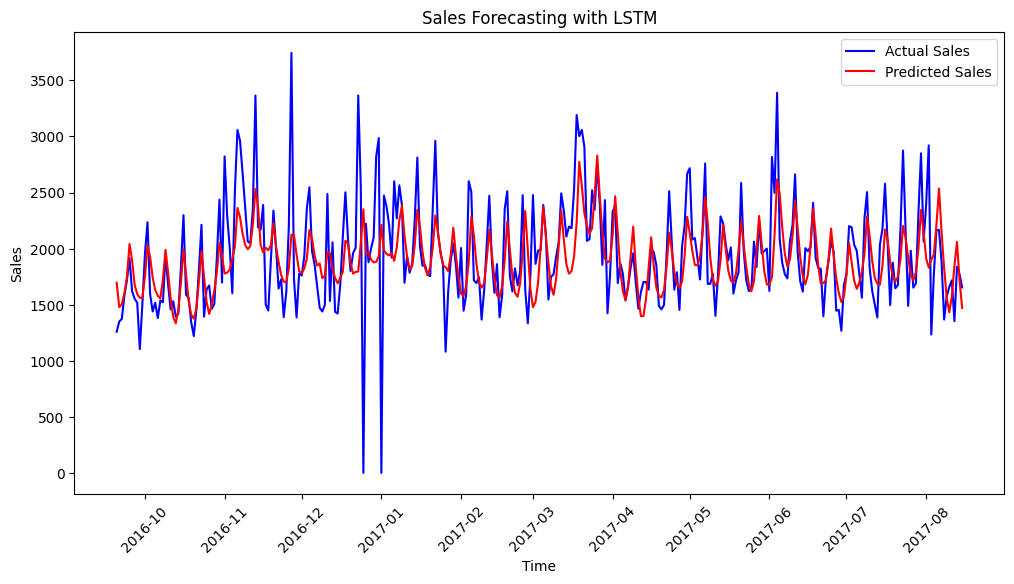

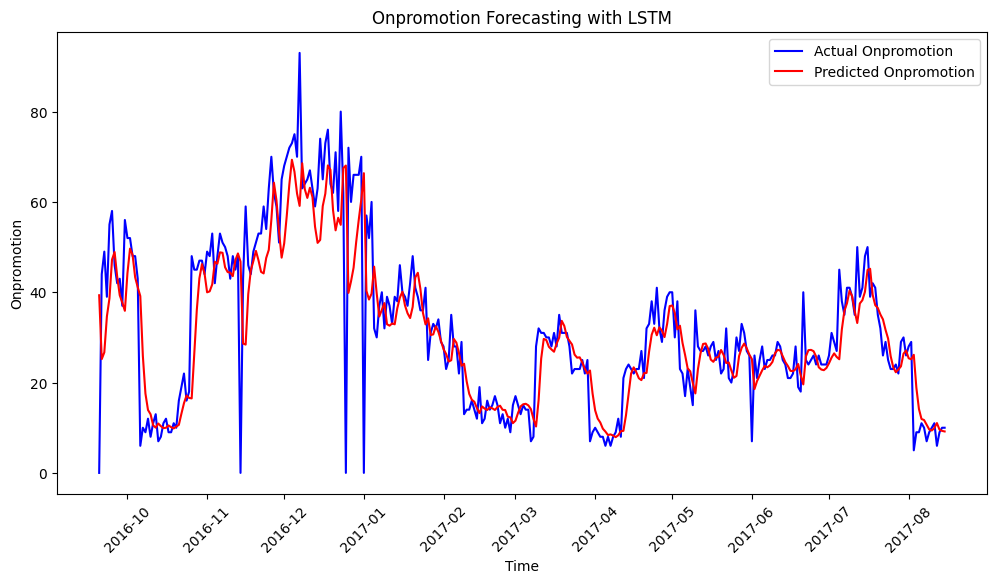

In [136]:
# Plot results for sales
plt.figure(figsize=(12, 6))
plt.plot(kolomTanggal['date'], y_test_unscaled_withDate['sales'], label='Actual Sales', color='blue')
plt.plot(kolomTanggal['date'], y_pred_unscaled_withDate['sales'], label='Predicted Sales', color='red')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.title('Sales Forecasting with LSTM')
plt.xticks(rotation=45)
plt.show()

# Plot results for onpromotion
plt.figure(figsize=(12, 6))
plt.plot(kolomTanggal['date'], y_test_unscaled_withDate['onpromotion'], label='Actual Onpromotion', color='blue')
plt.plot(kolomTanggal['date'], y_pred_unscaled_withDate['onpromotion'], label='Predicted Onpromotion', color='red')
plt.xlabel('Time')
plt.ylabel('Onpromotion')
plt.legend()
plt.title('Onpromotion Forecasting with LSTM')
plt.xticks(rotation=45)
plt.show()


# membandingkan kembali hasil Varmax dan LSTM

In [137]:
RMSE_Comparison ={
    "Topic" :['RMSE Sales','RMSE Onpromotion', 'Normalize RMSE'],
    "Varmax" : [varmax_rmse_sales,varmax_rmse_onpromotion,best_weighted_rmse],
    "LSTM" : [lstm_rmse_sales,lstm_rmse_onpromotion,lstm_weighted_rmse]
}

RMSE_Comparison_df = pd.DataFrame(RMSE_Comparison)
RMSE_Comparison_df

Topic      Varmax        LSTM
0        RMSE Sales  641.673104  381.828853
1  RMSE Onpromotion   31.411763   10.150608
2    Normalize RMSE    1.310497    0.513043